# Waveform analysis for fake trigger rate calculation:

In [1]:
import ROOT as root
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import matplotlib as mpl

Welcome to JupyROOT 6.16/00


In [2]:
def get_signal_index(file1):
    
    '''
    file1 - root file with simulated waveforms
    '''

    n_points = 0
    increment = 0
    amplitude = []
    window = 20
    argmax_all = []
    amplitude_cross_ac = []
    
    n_intervals = 0
    
    
    amplitude_arg_max = []
    amplitude_max_ac = []
    amplitude_max = []
    baseline = []
    pulse_amplitude = []
    
    if file1.find('.root') != -1:
        f1 = root.TFile(file1)
        myTree1 = f1.Get("T")
        
        #for entry_num in range (0 , myTree1.GetEntries ()):
        for entry_num in range (0 , 1000):
            myTree1.GetEntry(entry_num)
            
            if entry_num == 0:
                increment = myTree1.dt
                n_points = myTree1.NPoints
                v1_bias = myTree1.Vbias
                
            
            amplitude_1 = -1.* np.array(list(myTree1.V1))
            argmax_all.append(np.argmax(amplitude_1))
            
        
    else:
        print('incorrect file')
        
    return np.array(argmax_all)

calcualte the highest waveform amplitude within a given time window:

In [57]:
def get_waveforms_1px(file1, range_points, n_points_ignore = 200, baseline_range = (200, 500)):
    
    '''
    file1 - root file with simulated waveforms
    range_points - range of points within a waveform where to find the maximuma amplitude
    get the Max amplitude over a given range of points, defined by range_points
    n_points_ignore - number of points at the begining of te waveform which will be ignored
    '''

    n_points = 0
    increment = 0
    amplitude = []
    window = 20
    amplitude_cross = []
    amplitude_cross_ac = []
    
    n_intervals = 0
    
    
    amplitude_arg_max = []
    amplitude_max_ac = []
    amplitude_max = []
    baseline = []
    pulse_amplitude = []
    
    if file1.find('.root') != -1:
        f1 = root.TFile(file1)
        myTree1 = f1.Get("T")
        
        for entry_num in range (0 , myTree1.GetEntries ()):
        #for entry_num in range (0 , 1000):
            myTree1.GetEntry(entry_num)
            
            if entry_num == 0:
                increment = myTree1.dt
                n_points = myTree1.NPoints
                v1_bias = myTree1.Vbias
                
            
            amplitude_1 = -1.* np.array(list(myTree1.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_1_baseline = np.mean(-1.* np.array(list(myTree1.V1)[baseline_range[0]:baseline_range[1]]))
            
            amplitude_cross_1_ac = np.max(amplitude_1) - amplitude_1_baseline
            amplitude_cross_ac.append(amplitude_cross_1_ac)
            
        
    else:
        print('incorrect file')
        
    return np.array(amplitude_cross_ac)

In [4]:
def get_waveforms_2px(file1, file2, range_points, n_points_ignore = 50, do_sum = False):
    
    '''
    analyse data from 2 pixels:
    
    file1 - pixel#1 root file with simulated waveforms
    file2 - pixel#2 root file with simulated waveforms
    
    range_points - range of points within a waveform where to find the maximuma amplitude
    get the Max amplitude over a given range of points, defined by range_points
    
    n_points_ignore - number of points at the begining of te waveform which will be ignored
    
    by default, program is looking to a minimal maximum over two pixels (majority Triger)
    byt by setting do_sum == True, the program will sum the local maximum over 2 pixels
    '''

    n_points = 0
    increment = 0
    amplitude = []
    window = 20
    amplitude_cross = []
    amplitude_cross_ac = []
    
    n_intervals = 0
    
    
    amplitude_arg_max = []
    amplitude_max_ac = []
    amplitude_max = []
    baseline = []
    pulse_amplitude = []
    
    if file1.find('.root') != -1:
        f1 = root.TFile(file1)
        myTree1 = f1.Get("T")
        
        f2 = root.TFile(file2)
        myTree2 = f2.Get("T")
        
        for entry_num in range (0 , myTree1.GetEntries ()):
        #for entry_num in range (0 , 1000):
            myTree1.GetEntry(entry_num)
            myTree2.GetEntry(entry_num)
            
            if entry_num == 0:
                increment = myTree1.dt
                n_points = myTree1.NPoints
                v1_bias = myTree1.Vbias
                
            
            amplitude_1 = -1.* np.array(list(myTree1.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_1_baseline = np.mean(-1.* np.array(list(myTree1.V1)[n_points_ignore:]))
            amplitude_2 = -1.* np.array(list(myTree2.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_2_baseline = np.mean(-1.* np.array(list(myTree2.V1)[n_points_ignore:]))
            
            
            amplitude_cross_1 = np.max(amplitude_1)
            amplitude_cross_2 = np.max(amplitude_2)
            
            amplitude_cross_1_ac = np.max(amplitude_1) - amplitude_1_baseline
            amplitude_cross_2_ac = np.max(amplitude_2) - amplitude_2_baseline
            
            #amplitude_cross.append(amplitude_cross_1)
            
            if do_sum:
                amplitude_cross_ac.append(amplitude_cross_1_ac + amplitude_cross_2_ac)
            else:
                amplitude_cross_ac.append(min(amplitude_cross_1_ac, amplitude_cross_2_ac))
            
        
    else:
        print('incorrect file')
        
    return np.array(amplitude_cross_ac)

In [5]:
def get_waveforms_3px(file1, file2, file3, range_points, n_points_ignore = 50, do_sum = False):
    
    '''
    analyse data from 3 pixels:
    
    file1 - pixel#1 root file with simulated waveforms
    file2 - pixel#2 root file with simulated waveforms
    file3 - pixel#3 root file with simulated waveforms
    
    range_points - range of points within a waveform where to find the maximuma amplitude
    get the Max amplitude over a given range of points, defined by range_points
    
    n_points_ignore - number of points at the begining of te waveform which will be ignored
    
    by default, program is looking to a minimal maximum over 3 pixels (majority Triger)
    byt by setting do_sum == True, the program will sum the local maximum over 3 pixels
    '''

    n_points = 0
    increment = 0
    amplitude = []
    window = 20
    amplitude_cross = []
    amplitude_cross_ac = []
    
    n_intervals = 0
    
    
    amplitude_arg_max = []
    amplitude_max_ac = []
    amplitude_max = []
    baseline = []
    pulse_amplitude = []
    
    if file1.find('.root') != -1:
        f1 = root.TFile(file1)
        myTree1 = f1.Get("T")
        
        f2 = root.TFile(file2)
        myTree2 = f2.Get("T")
        
        f3 = root.TFile(file3)
        myTree3 = f3.Get("T")
        
        #for entry_num in range (0 , myTree1.GetEntries ()):
        for entry_num in range (0 , 1000):
            myTree1.GetEntry(entry_num)
            myTree2.GetEntry(entry_num)
            myTree3.GetEntry(entry_num)
            
            if entry_num == 0:
                increment = myTree1.dt
                n_points = myTree1.NPoints
                v1_bias = myTree1.Vbias
                
            
            amplitude_1 = -1.* np.array(list(myTree1.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_1_baseline = np.mean(-1.* np.array(list(myTree1.V1)[n_points_ignore:]))
            amplitude_2 = -1.* np.array(list(myTree2.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_2_baseline = np.mean(-1.* np.array(list(myTree2.V1)[n_points_ignore:]))
            amplitude_3 = -1.* np.array(list(myTree3.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_3_baseline = np.mean(-1.* np.array(list(myTree3.V1)[n_points_ignore:]))
            

            
            amplitude_cross_1_ac = np.max(amplitude_1) - amplitude_1_baseline
            amplitude_cross_2_ac = np.max(amplitude_2) - amplitude_2_baseline
            amplitude_cross_3_ac = np.max(amplitude_3) - amplitude_3_baseline
            
            if do_sum:
                amplitude_cross_ac.append(amplitude_cross_1_ac + amplitude_cross_2_ac + amplitude_cross_3_ac)
            else:
                amplitude_cross_ac.append(min(amplitude_cross_1_ac, amplitude_cross_2_ac, amplitude_cross_3_ac))
            
        
    else:
        print('incorrect file')
        
    return np.array(amplitude_cross_ac)

In [6]:
def get_waveforms_4px(file1, file2, file3, file4, range_points, n_points_ignore = 50, do_sum = False):
    
    '''
    analyse data from 4 pixels:
    
    file1 - pixel#1 root file with simulated waveforms
    file2 - pixel#2 root file with simulated waveforms
    file3 - pixel#3 root file with simulated waveforms
    file4 - pixel#4 root file with simulated waveforms
    
    range_points - range of points within a waveform where to find the maximuma amplitude
    get the Max amplitude over a given range of points, defined by range_points
    
    n_points_ignore - number of points at the begining of te waveform which will be ignored
    
    by default, program is looking to a minimal maximum over 4 pixels (majority Triger)
    byt by setting do_sum == True, the program will sum the local maximum over 4 pixels
    '''

    n_points = 0
    increment = 0
    amplitude = []
    window = 20
    amplitude_cross = []
    amplitude_cross_ac = []
    
    n_intervals = 0
    
    
    amplitude_arg_max = []
    amplitude_max_ac = []
    amplitude_max = []
    baseline = []
    pulse_amplitude = []
    
    if file1.find('.root') != -1:
        f1 = root.TFile(file1)
        myTree1 = f1.Get("T")
        
        f2 = root.TFile(file2)
        myTree2 = f2.Get("T")
        
        f3 = root.TFile(file3)
        myTree3 = f3.Get("T")
        
        f4 = root.TFile(file4)
        myTree4 = f4.Get("T")
        
        for entry_num in range (0 , myTree1.GetEntries ()):
        #for entry_num in range (0 , 1000):
            myTree1.GetEntry(entry_num)
            myTree2.GetEntry(entry_num)
            myTree3.GetEntry(entry_num)
            myTree4.GetEntry(entry_num)
            
            if entry_num == 0:
                increment = myTree1.dt
                n_points = myTree1.NPoints
                v1_bias = myTree1.Vbias
                
            
            amplitude_1 = -1.* np.array(list(myTree1.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_1_baseline = np.mean(-1.* np.array(list(myTree1.V1)[n_points_ignore:]))
            amplitude_2 = -1.* np.array(list(myTree2.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_2_baseline = np.mean(-1.* np.array(list(myTree2.V1)[n_points_ignore:]))
            amplitude_3 = -1.* np.array(list(myTree3.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_3_baseline = np.mean(-1.* np.array(list(myTree3.V1)[n_points_ignore:]))
            amplitude_4 = -1.* np.array(list(myTree4.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_4_baseline = np.mean(-1.* np.array(list(myTree4.V1)[n_points_ignore:]))
            

            
            amplitude_cross_1_ac = np.max(amplitude_1) - amplitude_1_baseline
            amplitude_cross_2_ac = np.max(amplitude_2) - amplitude_2_baseline
            amplitude_cross_3_ac = np.max(amplitude_3) - amplitude_3_baseline
            amplitude_cross_4_ac = np.max(amplitude_4) - amplitude_4_baseline
            
            if do_sum:
                amplitude_cross_ac.append(amplitude_cross_1_ac + amplitude_cross_2_ac + amplitude_cross_3_ac + 
                                          amplitude_cross_4_ac)
            else:
                amplitude_cross_ac.append(min(amplitude_cross_1_ac, amplitude_cross_2_ac, 
                                          amplitude_cross_3_ac, amplitude_cross_4_ac))
            
            '''
            for i_time in range(len(amplitude_1)):
                amplitude_cross_1 = np.max(amplitude_1[i_time:i_time+window])
                amplitude_cross_2 = np.max(amplitude_2[i_time:i_time+window])
                
                amplitude_cross.append(min(amplitude_cross_1, amplitude_cross_2))
            '''
            
        
    else:
        print('incorrect file')
        
    return np.array(amplitude_cross_ac)

In [7]:
def get_waveforms_5px(file1, file2, file3, file4, file5, range_points, n_points_ignore = 50, do_sum = False):\
    
    '''
    analyse data from 5 pixels:
    
    file1 - pixel#1 root file with simulated waveforms
    file2 - pixel#2 root file with simulated waveforms
    file3 - pixel#3 root file with simulated waveforms
    file4 - pixel#4 root file with simulated waveforms
    file5 - pixel#5 root file with simulated waveforms
    
    range_points - range of points within a waveform where to find the maximuma amplitude
    get the Max amplitude over a given range of points, defined by range_points
    
    n_points_ignore - number of points at the begining of te waveform which will be ignored
    
    by default, program is looking to a minimal maximum over 5 pixels (majority Triger)
    byt by setting do_sum == True, the program will sum the local maximum over 5 pixels
    '''

    n_points = 0
    increment = 0
    amplitude = []
    window = 20
    amplitude_cross = []
    amplitude_cross_ac = []
    
    n_intervals = 0
    
    
    amplitude_arg_max = []
    amplitude_max_ac = []
    amplitude_max = []
    baseline = []
    pulse_amplitude = []
    
    if file1.find('.root') != -1:
        f1 = root.TFile(file1)
        myTree1 = f1.Get("T")
        
        f2 = root.TFile(file2)
        myTree2 = f2.Get("T")
        
        f3 = root.TFile(file3)
        myTree3 = f3.Get("T")
        
        f4 = root.TFile(file4)
        myTree4 = f4.Get("T")
        
        f5 = root.TFile(file5)
        myTree5 = f5.Get("T")
        
        for entry_num in range (0 , myTree1.GetEntries ()):
        #for entry_num in range (0 , 1000):
            myTree1.GetEntry(entry_num)
            myTree2.GetEntry(entry_num)
            myTree3.GetEntry(entry_num)
            myTree4.GetEntry(entry_num)
            myTree5.GetEntry(entry_num)
            
            if entry_num == 0:
                increment = myTree1.dt
                n_points = myTree1.NPoints
                v1_bias = myTree1.Vbias
                
            
            amplitude_1 = -1.* np.array(list(myTree1.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_1_baseline = np.mean(-1.* np.array(list(myTree1.V1)[n_points_ignore:]))
            amplitude_2 = -1.* np.array(list(myTree2.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_2_baseline = np.mean(-1.* np.array(list(myTree2.V1)[n_points_ignore:]))
            amplitude_3 = -1.* np.array(list(myTree3.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_3_baseline = np.mean(-1.* np.array(list(myTree3.V1)[n_points_ignore:]))
            amplitude_4 = -1.* np.array(list(myTree4.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_4_baseline = np.mean(-1.* np.array(list(myTree4.V1)[n_points_ignore:]))
            amplitude_5 = -1.* np.array(list(myTree5.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_5_baseline = np.mean(-1.* np.array(list(myTree5.V1)[n_points_ignore:]))
            

            
            amplitude_cross_1_ac = np.max(amplitude_1) - amplitude_1_baseline
            amplitude_cross_2_ac = np.max(amplitude_2) - amplitude_2_baseline
            amplitude_cross_3_ac = np.max(amplitude_3) - amplitude_3_baseline
            amplitude_cross_4_ac = np.max(amplitude_4) - amplitude_4_baseline
            amplitude_cross_5_ac = np.max(amplitude_5) - amplitude_5_baseline
            
            if do_sum:
                amplitude_cross_ac.append(amplitude_cross_1_ac + amplitude_cross_2_ac + amplitude_cross_3_ac + 
                                          amplitude_cross_4_ac + amplitude_cross_5_ac)
            else:
                amplitude_cross_ac.append(min(amplitude_cross_1_ac, amplitude_cross_2_ac, amplitude_cross_3_ac, amplitude_cross_4_ac, amplitude_cross_5_ac))
            
            '''
            for i_time in range(len(amplitude_1)):
                amplitude_cross_1 = np.max(amplitude_1[i_time:i_time+window])
                amplitude_cross_2 = np.max(amplitude_2[i_time:i_time+window])
                
                amplitude_cross.append(min(amplitude_cross_1, amplitude_cross_2))
            '''
            
        
    else:
        print('incorrect file')
        
    return np.array(amplitude_cross_ac)

In [8]:
def get_waveforms_9px(file1, file2, file3, file4, file5, file6, file7, file8, file9, range_points, n_points_ignore = 50, do_sum = False):

    '''
    analyse data from 9 pixels:
    
    file1 - pixel#1 root file with simulated waveforms
    file2 - pixel#2 root file with simulated waveforms
    file3 - pixel#3 root file with simulated waveforms
    file4 - pixel#4 root file with simulated waveforms
    file5 - pixel#5 root file with simulated waveforms
    file6 - pixel#5 root file with simulated waveforms
    file7 - pixel#5 root file with simulated waveforms
    file8 - pixel#5 root file with simulated waveforms
    file9 - pixel#5 root file with simulated waveforms
    
    range_points - range of points within a waveform where to find the maximuma amplitude
    get the Max amplitude over a given range of points, defined by range_points
    
    n_points_ignore - number of points at the begining of te waveform which will be ignored
    
    by default, program is looking to a minimal maximum over 9 pixels (majority Triger)
    byt by setting do_sum == True, the program will sum the local maximum over 9 pixels
    '''
    
    n_points = 0
    increment = 0
    amplitude = []
    window = 20
    amplitude_cross = []
    amplitude_cross_ac = []
    
    n_intervals = 0
    
    
    amplitude_arg_max = []
    amplitude_max_ac = []
    amplitude_max = []
    baseline = []
    pulse_amplitude = []
    
    if file1.find('.root') != -1:
        f1 = root.TFile(file1)
        myTree1 = f1.Get("T")
        f2 = root.TFile(file2)
        myTree2 = f2.Get("T")
        f3 = root.TFile(file3)
        myTree3 = f3.Get("T")
        f4 = root.TFile(file4)
        myTree4 = f4.Get("T")
        f5 = root.TFile(file5)
        myTree5 = f5.Get("T")
        f6 = root.TFile(file6)
        myTree6 = f6.Get("T")
        f7 = root.TFile(file7)
        myTree7 = f7.Get("T")
        f8 = root.TFile(file8)
        myTree8 = f8.Get("T")
        f9 = root.TFile(file9)
        myTree9 = f9.Get("T")
        
        for entry_num in range (0 , myTree1.GetEntries ()):
        #for entry_num in range (0 , 1000):
            myTree1.GetEntry(entry_num)
            myTree2.GetEntry(entry_num)
            myTree3.GetEntry(entry_num)
            myTree4.GetEntry(entry_num)
            myTree5.GetEntry(entry_num)
            myTree6.GetEntry(entry_num)
            myTree7.GetEntry(entry_num)
            myTree8.GetEntry(entry_num)
            myTree9.GetEntry(entry_num)
            
            if entry_num == 0:
                increment = myTree1.dt
                n_points = myTree1.NPoints
                v1_bias = myTree1.Vbias
                
            
            amplitude_1 = -1.* np.array(list(myTree1.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_1_baseline = np.mean(-1.* np.array(list(myTree1.V1)[n_points_ignore:]))
            amplitude_2 = -1.* np.array(list(myTree2.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_2_baseline = np.mean(-1.* np.array(list(myTree2.V1)[n_points_ignore:]))
            amplitude_3 = -1.* np.array(list(myTree3.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_3_baseline = np.mean(-1.* np.array(list(myTree3.V1)[n_points_ignore:]))
            amplitude_4 = -1.* np.array(list(myTree4.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_4_baseline = np.mean(-1.* np.array(list(myTree4.V1)[n_points_ignore:]))
            amplitude_5 = -1.* np.array(list(myTree5.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_5_baseline = np.mean(-1.* np.array(list(myTree5.V1)[n_points_ignore:]))
            amplitude_6 = -1.* np.array(list(myTree6.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_6_baseline = np.mean(-1.* np.array(list(myTree6.V1)[n_points_ignore:]))
            amplitude_7 = -1.* np.array(list(myTree7.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_7_baseline = np.mean(-1.* np.array(list(myTree7.V1)[n_points_ignore:]))
            amplitude_8 = -1.* np.array(list(myTree8.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_8_baseline = np.mean(-1.* np.array(list(myTree8.V1)[n_points_ignore:]))
            amplitude_9 = -1.* np.array(list(myTree9.V1)[n_points_ignore:n_points_ignore+range_points])
            amplitude_9_baseline = np.mean(-1.* np.array(list(myTree9.V1)[n_points_ignore:]))
            

            
            amplitude_cross_1_ac = np.max(amplitude_1) - amplitude_1_baseline
            amplitude_cross_2_ac = np.max(amplitude_2) - amplitude_2_baseline
            amplitude_cross_3_ac = np.max(amplitude_3) - amplitude_3_baseline
            amplitude_cross_4_ac = np.max(amplitude_4) - amplitude_4_baseline
            amplitude_cross_5_ac = np.max(amplitude_5) - amplitude_5_baseline
            amplitude_cross_6_ac = np.max(amplitude_6) - amplitude_6_baseline
            amplitude_cross_7_ac = np.max(amplitude_7) - amplitude_7_baseline
            amplitude_cross_8_ac = np.max(amplitude_8) - amplitude_8_baseline
            amplitude_cross_9_ac = np.max(amplitude_9) - amplitude_9_baseline
            
            if do_sum:
                amplitude_cross_ac.append(amplitude_cross_1_ac + amplitude_cross_2_ac + amplitude_cross_3_ac + 
                                          amplitude_cross_4_ac + amplitude_cross_5_ac + amplitude_cross_6_ac +
                                         amplitude_cross_7_ac + + amplitude_cross_8_ac + + amplitude_cross_9_ac)
            else:
                amplitude_cross_ac.append(min(amplitude_cross_1_ac, amplitude_cross_2_ac, amplitude_cross_3_ac, amplitude_cross_4_ac, amplitude_cross_5_ac,
                                             amplitude_cross_6_ac, amplitude_cross_7_ac, amplitude_cross_8_ac, amplitude_cross_9_ac))
            
            '''
            for i_time in range(len(amplitude_1)):
                amplitude_cross_1 = np.max(amplitude_1[i_time:i_time+window])
                amplitude_cross_2 = np.max(amplitude_2[i_time:i_time+window])
                
                amplitude_cross.append(min(amplitude_cross_1, amplitude_cross_2))
            '''
            
        
    else:
        print('incorrect file')
        
    return np.array(amplitude_cross_ac)

In [20]:
def get_waveform(file, n_read = 10):
    
    '''
    get first N waveforms in a file
    '''

    f = root.TFile(file)
    myTree = f.Get("T")

    amplitude = []
    
    for entry_num in range (0 , n_read):
        myTree.GetEntry(entry_num)
            
        if entry_num == 0:
            increment = myTree.dt
            n_points = myTree.NPoints
            v_bias = myTree.Vbias
        
        amplitude.append(-1.* np.array(list(myTree.V1)))
        
    return increment, n_points, amplitude

In [10]:
def get_n_events_vs_threshold(data_amplitude_max, threshold):
    
    n_events = []
    
    for i_th in threshold:
        n_events.append( len(data_amplitude_max[data_amplitude_max>i_th]) )
        
    return n_events

### Read Signal Templates:

In [15]:
data_FbK = np.loadtxt('./waveform_sim/NUV_HD_template_email.txt', dtype=float, comments='#', delimiter = ' ')
data_measured = np.loadtxt('./waveform_sim/NUV_HD_6x6_75NC_Miteq.out', dtype=float, comments='#', delimiter = ' ')
data_LCT5NUV = np.loadtxt('./waveform_sim/LCT5_NUV_Template_Miteq.txt', dtype=float, comments='#', delimiter = ' ')

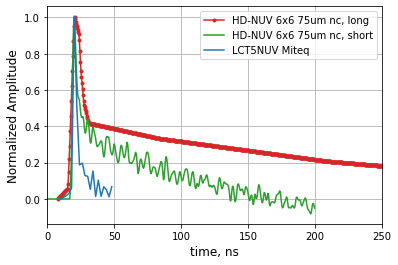

In [82]:
a_max = np.max(data_FbK[:,1])

plt.plot(data_FbK[:,0] + 8, data_FbK[:,1]/a_max, '.-', c = 'tab:red', label = 'HD-NUV 6x6 75um nc, long')
plt.plot(data_measured[:,0], data_measured[:,1], '-',  c = 'tab:green', label = 'HD-NUV 6x6 75um nc, short')
plt.plot(data_LCT5NUV[:,0] + 10, data_LCT5NUV[:,1], '-', c = 'tab:blue', label = 'LCT5NUV Miteq')
plt.grid()
plt.xlim(0.0, 250)
plt.legend()
plt.xlabel("time, ns", fontsize=12)
plt.ylabel("Normalized Amplitude", fontsize=12)
plt.savefig('signal_shapes.pdf')

### Simulated results: 

without Shower, just NSB of 9.3 MHz, DCR = 0 MHz

In [17]:
lct5nuv = './waveform_sim/data/short_sim/3V_3.1e+07_Hz_0_AC_LCT5_NUV_Template_Miteq.txt.root'
nuvhd6x6_fbk = './waveform_sim/data/short_sim/3V_3.1e+07_Hz_0_AC_NUV_HD_template_email.txt.root'
nuvhd6x6_miteq = './waveform_sim/data/short_sim/3V_3.1e+07_Hz_0_AC_NUV_HD_6x6_75NC_Miteq.out.root'

with Shower of 7p.e. with Gaus time distribution of STD = 5 ns, NSB of 9.3 MHz, DCR = 0 MHz

In [28]:
lct5nuv_signal = './waveform_sim/data/short_sim/3V_3.1e+07_Hz_7_AC_LCT5_NUV_Template_Miteq.txt.root'
nuvhd6x6_fbk_signal = './waveform_sim/data/short_sim/3V_3.1e+07_Hz_7_AC_NUV_HD_template_email.txt.root'
nuvhd6x6_miteq_signal = './waveform_sim/data/short_sim/3V_3.1e+07_Hz_7_AC_NUV_HD_6x6_75NC_Miteq.out.root'

### Simulated waveforms: 

In [21]:
lct5nuv_dt, lct5nuv_n_p, lct5nuv_ampli = get_waveform(lct5nuv)
nuv_hd_fbg_dt, nuv_hd_fbg_n_p, nuv_hd_fbg_ampli = get_waveform(nuvhd6x6_fbk)
nuv_hd_miteq_dt, nuv_hd_miteq_n_p, nuv_hd_miteq_ampli = get_waveform(nuvhd6x6_miteq)

In [29]:
lct5nuv_dt_signal, lct5nuv_n_p_signal, lct5nuv_ampli_signal = get_waveform(lct5nuv_signal)
nuv_hd_fbg_dt_signal, nuv_hd_fbg_n_p_signal, nuv_hd_fbg_ampli_signal = get_waveform(nuvhd6x6_fbk_signal)
nuv_hd_miteq_dt_signal, nuv_hd_miteq_n_p_signal, nuv_hd_miteq_ampli_signal = get_waveform(nuvhd6x6_miteq_signal)

### effect of differen signal shape (i.e. template) into waveforms without signal, only NSB (~ 9.3 MHz of p.e.):

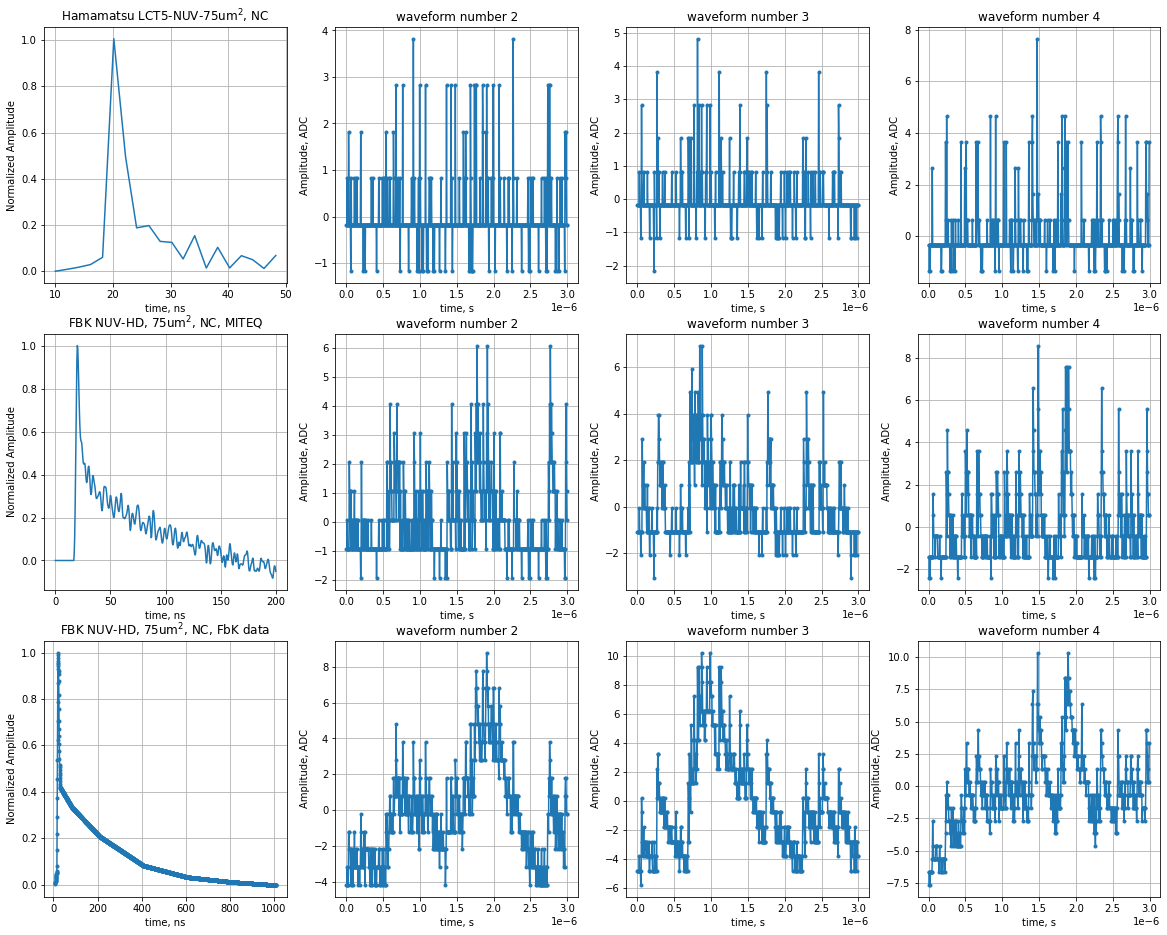

In [30]:
fig, axs = plt.subplots(3, 4, figsize=(20, 16))
n_start = 2

axs[0,0].plot(data_LCT5NUV[:,0] + 10, data_LCT5NUV[:,1], '-', label = 'LCT5NUV Miteq')
axs[0,0].grid()
axs[0,0].set_ylabel('Normalized Amplitude')
axs[0,0].set_xlabel('time, ns')
axs[0,0].set_title('Hamamatsu LCT5-NUV-75um$^2$, NC')

axs[0,1].plot(np.arange(0, lct5nuv_n_p*lct5nuv_dt, lct5nuv_dt), lct5nuv_ampli[n_start] 
              - np.mean(lct5nuv_ampli[n_start][50:]), '.-')
axs[0,1].grid()
axs[0,1].set_ylabel('Amplitude, ADC')
axs[0,1].set_xlabel('time, s')
axs[0,1].set_title('waveform number {:}'.format(n_start))


axs[0,2].plot(np.arange(0, lct5nuv_n_p*lct5nuv_dt, lct5nuv_dt), lct5nuv_ampli[n_start + 1] - 
              np.mean(lct5nuv_ampli[n_start + 1][50:]), '.-')
axs[0,2].grid()
axs[0,2].set_ylabel('Amplitude, ADC')
axs[0,2].set_xlabel('time, s')
axs[0,2].set_title('waveform number {:}'.format(n_start+1))

axs[0,3].plot(np.arange(0, lct5nuv_n_p*lct5nuv_dt, lct5nuv_dt), lct5nuv_ampli[n_start + 2] - 
              np.mean(lct5nuv_ampli[n_start + 2][50:]), '.-')
axs[0,3].grid()
axs[0,3].set_ylabel('Amplitude, ADC')
axs[0,3].set_xlabel('time, s')
axs[0,3].set_title('waveform number {:}'.format(n_start+2))


axs[1,0].plot(data_measured[:,0], data_measured[:,1], '-', label = 'HD-NUV 6x6 75um nc, Miteq')
axs[1,0].grid()
axs[1,0].set_ylabel('Normalized Amplitude')
axs[1,0].set_xlabel('time, ns')
axs[1,0].set_title('FBK NUV-HD, 75um$^2$, NC, MITEQ')

axs[1,1].plot(np.arange(0, nuv_hd_miteq_n_p*nuv_hd_miteq_dt, nuv_hd_miteq_dt), nuv_hd_miteq_ampli[n_start] 
              - np.mean(nuv_hd_miteq_ampli[n_start][50:]), '.-')
axs[1,1].grid()
axs[1,1].set_ylabel('Amplitude, ADC')
axs[1,1].set_xlabel('time, s')
axs[1,1].set_title('waveform number {:}'.format(n_start))

axs[1,2].plot(np.arange(0, nuv_hd_miteq_n_p*nuv_hd_miteq_dt, nuv_hd_miteq_dt), nuv_hd_miteq_ampli[n_start + 1] 
              - np.mean(nuv_hd_miteq_ampli[n_start + 1][50:]), '.-')
axs[1,2].grid()
axs[1,2].set_ylabel('Amplitude, ADC')
axs[1,2].set_xlabel('time, s')
axs[1,2].set_title('waveform number {:}'.format(n_start+1))

axs[1,3].plot(np.arange(0, nuv_hd_miteq_n_p*nuv_hd_miteq_dt, nuv_hd_miteq_dt), nuv_hd_miteq_ampli[n_start + 2] - 
              np.mean(nuv_hd_miteq_ampli[n_start + 2][50:]), '.-')
axs[1,3].grid()
axs[1,3].set_ylabel('Amplitude, ADC')
axs[1,3].set_xlabel('time, s')
axs[1,3].set_title('waveform number {:}'.format(n_start+2))




axs[2,0].plot(data_FbK[:,0] + 8, data_FbK[:,1]/a_max, '.-', label = 'HD-NUV 6x6 75um nc, email')
axs[2,0].grid()
axs[2,0].set_ylabel('Normalized Amplitude')
axs[2,0].set_xlabel('time, ns')
axs[2,0].set_title('FBK NUV-HD, 75um$^2$, NC, FbK data')

axs[2,1].plot(np.arange(0, nuv_hd_fbg_n_p*nuv_hd_fbg_dt, nuv_hd_fbg_dt), nuv_hd_fbg_ampli[n_start] 
              - np.mean(nuv_hd_fbg_ampli[n_start][50:]), '.-')
axs[2,1].grid()
axs[2,1].set_ylabel('Amplitude, ADC')
axs[2,1].set_xlabel('time, s')
axs[2,1].set_title('waveform number {:}'.format(n_start))

axs[2,2].plot(np.arange(0, nuv_hd_fbg_n_p*nuv_hd_fbg_dt, nuv_hd_fbg_dt), nuv_hd_fbg_ampli[n_start + 1] 
              - np.mean(nuv_hd_fbg_ampli[n_start + 1][50:]), '.-')
axs[2,2].grid()
axs[2,2].set_ylabel('Amplitude, ADC')
axs[2,2].set_xlabel('time, s')
axs[2,2].set_title('waveform number {:}'.format(n_start+1))

axs[2,3].plot(np.arange(0, nuv_hd_fbg_n_p*nuv_hd_fbg_dt, nuv_hd_fbg_dt), nuv_hd_fbg_ampli[n_start + 2] 
              - np.mean(nuv_hd_fbg_ampli[n_start + 2][50:]), '.-')
axs[2,3].grid()
axs[2,3].set_ylabel('Amplitude, ADC')
axs[2,3].set_xlabel('time, s')
axs[2,3].set_title('waveform number {:}'.format(n_start+2))
plt.savefig('waveform_comparison_nsb.pdf')

### effect of differen signal shape (i.e. template) into waveforms with signal and NSB (~ 9.3 MHz of p.e.):

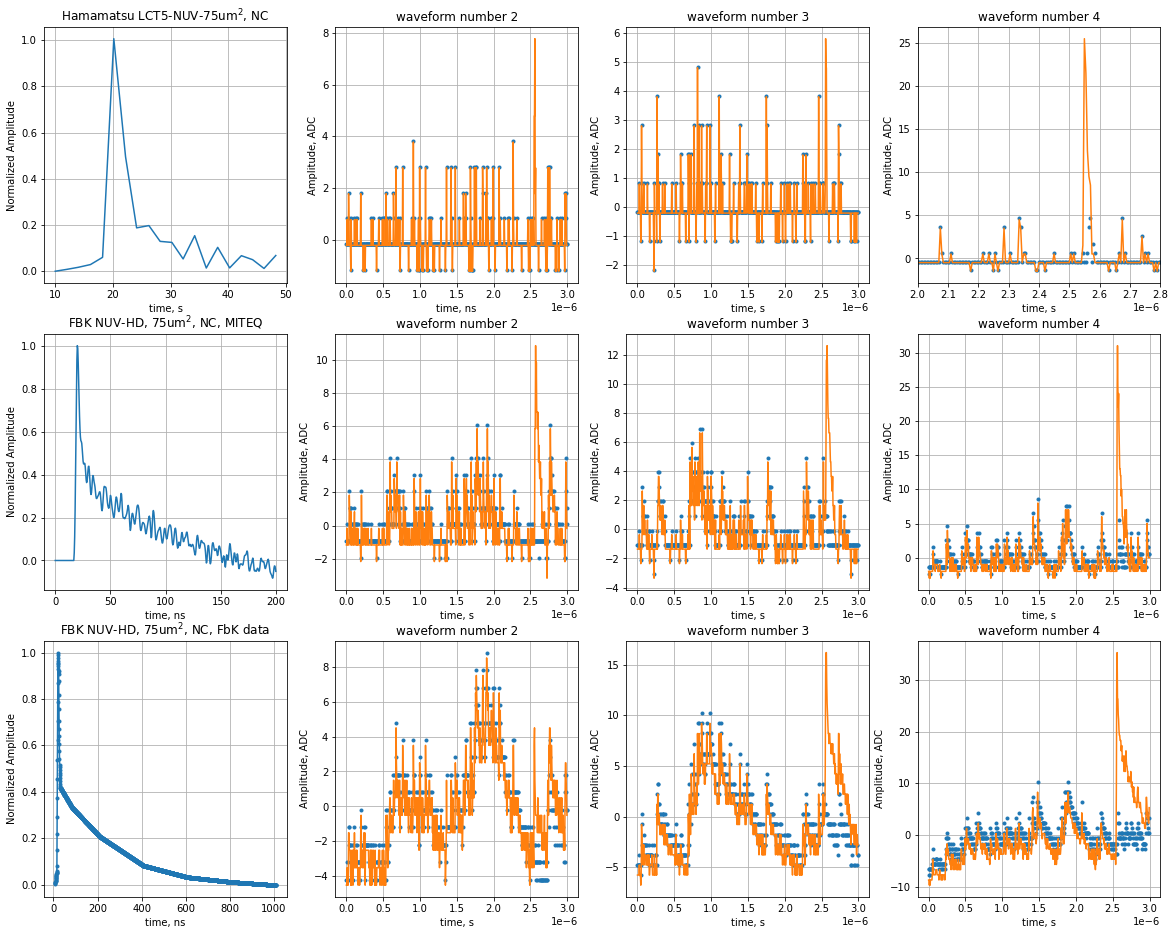

In [32]:
fig, axs = plt.subplots(3, 4, figsize=(20, 16))
n_start = 2

axs[0,0].plot(data_LCT5NUV[:,0] + 10, data_LCT5NUV[:,1], '-', label = 'LCT5NUV Miteq')
axs[0,0].grid()
axs[0,0].set_ylabel('Normalized Amplitude')
axs[0,0].set_xlabel('time, s')
axs[0,0].set_title('Hamamatsu LCT5-NUV-75um$^2$, NC')

axs[0,1].plot(np.arange(0, lct5nuv_n_p_signal*lct5nuv_dt, lct5nuv_dt), lct5nuv_ampli[n_start] 
              - np.mean(lct5nuv_ampli[n_start][50:]), '.')
axs[0,1].plot(np.arange(0, lct5nuv_n_p_signal*lct5nuv_dt_signal, lct5nuv_dt_signal), lct5nuv_ampli_signal[n_start] 
              - np.mean(lct5nuv_ampli_signal[n_start][50:]))
axs[0,1].grid()
axs[0,1].set_ylabel('Amplitude, ADC')
axs[0,1].set_xlabel('time, ns')
axs[0,1].set_title('waveform number {:}'.format(n_start))


axs[0,2].plot(np.arange(0, lct5nuv_n_p*lct5nuv_dt, lct5nuv_dt), lct5nuv_ampli[n_start + 1] - 
              np.mean(lct5nuv_ampli[n_start + 1][50:]), '.')
axs[0,2].plot(np.arange(0, lct5nuv_n_p_signal*lct5nuv_dt_signal, lct5nuv_dt_signal), lct5nuv_ampli_signal[n_start+1] 
              - np.mean(lct5nuv_ampli_signal[n_start+1][50:]))
axs[0,2].grid()
axs[0,2].set_ylabel('Amplitude, ADC')
axs[0,2].set_xlabel('time, s')
axs[0,2].set_title('waveform number {:}'.format(n_start + 1))

axs[0,3].plot(np.arange(0, lct5nuv_n_p*lct5nuv_dt, lct5nuv_dt), lct5nuv_ampli[n_start + 2] - 
              np.mean(lct5nuv_ampli[n_start + 2][50:]), '.')
axs[0,3].plot(np.arange(0, lct5nuv_n_p_signal*lct5nuv_dt_signal, lct5nuv_dt_signal), lct5nuv_ampli_signal[n_start+2] 
              - np.mean(lct5nuv_ampli_signal[n_start+2][50:]))
axs[0,3].grid()
axs[0,3].set_ylabel('Amplitude, ADC')
axs[0,3].set_xlabel('time, s')
axs[0,3].set_xlim(2.e-6,2.8e-6)
axs[0,3].set_title('waveform number {:}'.format(n_start + 2))

axs[1,0].plot(data_measured[:,0], data_measured[:,1], '-', label = 'HD-NUV 6x6 75um nc, Miteq')
axs[1,0].grid()
axs[1,0].set_ylabel('Normalized Amplitude')
axs[1,0].set_xlabel('time, ns')
axs[1,0].set_title('FBK NUV-HD, 75um$^2$, NC, MITEQ')

axs[1,1].plot(np.arange(0, nuv_hd_miteq_n_p*nuv_hd_miteq_dt, nuv_hd_miteq_dt), nuv_hd_miteq_ampli[n_start] 
              - np.mean(nuv_hd_miteq_ampli[n_start][50:]), '.')
axs[1,1].plot(np.arange(0, nuv_hd_miteq_n_p_signal*nuv_hd_miteq_dt_signal, nuv_hd_miteq_dt_signal), nuv_hd_miteq_ampli_signal[n_start] 
              - np.mean(nuv_hd_miteq_ampli_signal[n_start][50:]))
axs[1,1].grid()
axs[1,1].set_ylabel('Amplitude, ADC')
axs[1,1].set_xlabel('time, s')
axs[1,1].set_title('waveform number {:}'.format(n_start))


axs[1,2].plot(np.arange(0, nuv_hd_miteq_n_p*nuv_hd_miteq_dt, nuv_hd_miteq_dt), nuv_hd_miteq_ampli[n_start + 1] 
              - np.mean(nuv_hd_miteq_ampli[n_start + 1][50:]), '.')
axs[1,2].plot(np.arange(0, nuv_hd_miteq_n_p_signal*nuv_hd_miteq_dt_signal, nuv_hd_miteq_dt_signal), nuv_hd_miteq_ampli_signal[n_start + 1] 
              - np.mean(nuv_hd_miteq_ampli_signal[n_start + 1][50:]))
axs[1,2].grid()
axs[1,2].set_ylabel('Amplitude, ADC')
axs[1,2].set_xlabel('time, s')
axs[1,2].set_title('waveform number {:}'.format(n_start+1))

axs[1,3].plot(np.arange(0, nuv_hd_miteq_n_p*nuv_hd_miteq_dt, nuv_hd_miteq_dt), nuv_hd_miteq_ampli[n_start + 2] - 
              np.mean(nuv_hd_miteq_ampli[n_start + 2][50:]), '.')
axs[1,3].plot(np.arange(0, nuv_hd_miteq_n_p_signal*nuv_hd_miteq_dt_signal, nuv_hd_miteq_dt_signal), nuv_hd_miteq_ampli_signal[n_start + 2] - 
              np.mean(nuv_hd_miteq_ampli_signal[n_start + 2][50:]))
axs[1,3].grid()
axs[1,3].set_ylabel('Amplitude, ADC')
axs[1,3].set_xlabel('time, s')
axs[1,3].set_title('waveform number {:}'.format(n_start+2))


axs[2,0].plot(data_FbK[:,0] + 8, data_FbK[:,1]/a_max, '.-', label = 'HD-NUV 6x6 75um nc, email')
axs[2,0].grid()
axs[2,0].set_ylabel('Normalized Amplitude')
axs[2,0].set_xlabel('time, ns')
axs[2,0].set_title('FBK NUV-HD, 75um$^2$, NC, FbK data')

axs[2,1].plot(np.arange(0, nuv_hd_fbg_n_p*nuv_hd_fbg_dt, nuv_hd_fbg_dt), nuv_hd_fbg_ampli[n_start] 
              - np.mean(nuv_hd_fbg_ampli[n_start][50:]), '.')
axs[2,1].plot(np.arange(0, nuv_hd_fbg_n_p_signal*nuv_hd_fbg_dt_signal, nuv_hd_fbg_dt_signal), nuv_hd_fbg_ampli_signal[n_start] 
              - np.mean(nuv_hd_fbg_ampli_signal[n_start][50:]))
axs[2,1].grid()
axs[2,1].set_ylabel('Amplitude, ADC')
axs[2,1].set_xlabel('time, s')
axs[2,1].set_title('waveform number {:}'.format(n_start))

axs[2,2].plot(np.arange(0, nuv_hd_fbg_n_p*nuv_hd_fbg_dt, nuv_hd_fbg_dt), nuv_hd_fbg_ampli[n_start + 1] 
              - np.mean(nuv_hd_fbg_ampli[n_start + 1][50:]), '.')
axs[2,2].plot(np.arange(0, nuv_hd_fbg_n_p_signal*nuv_hd_fbg_dt_signal, nuv_hd_fbg_dt_signal), nuv_hd_fbg_ampli_signal[n_start + 1] 
              - np.mean(nuv_hd_fbg_ampli_signal[n_start + 1][50:]))
axs[2,2].grid()
axs[2,2].set_ylabel('Amplitude, ADC')
axs[2,2].set_xlabel('time, s')
axs[2,2].set_title('waveform number {:}'.format(n_start+1))

axs[2,3].plot(np.arange(0, nuv_hd_fbg_n_p*nuv_hd_fbg_dt, nuv_hd_fbg_dt), nuv_hd_fbg_ampli[n_start + 2] 
              - np.mean(nuv_hd_fbg_ampli[n_start + 2][50:]), '.')
axs[2,3].plot(np.arange(0, nuv_hd_fbg_n_p_signal*nuv_hd_fbg_dt_signal, nuv_hd_fbg_dt_signal), nuv_hd_fbg_ampli_signal[n_start + 2] 
              - np.mean(nuv_hd_fbg_ampli_signal[n_start + 2][50:]))
axs[2,3].grid()
axs[2,3].set_ylabel('Amplitude, ADC')
axs[2,3].set_xlabel('time, s')
axs[2,3].set_title('waveform number {:}'.format(n_start+2))
plt.savefig('waveform_comparison_signal.pdf')

In [33]:
lct5nuv = './waveform_sim/data/3V_3.1e+07_Hz_0_AC_LCT5_NUV_Template_Miteq.txt.root'
nuvhd6x6_fbk = './waveform_sim/data/3V_3.1e+07_Hz_0_AC_NUV_HD_template_email.txt.root'
nuvhd6x6_miteq = './waveform_sim/data/3V_3.1e+07_Hz_0_AC_NUV_HD_6x6_75NC_Miteq.out.root'

### Photons distribution: 

In [34]:
def get_photon_data(file_root):
    
    f1 = root.TFile(file_root)
    myTree1 = f1.Get("PulseDetected")
    
    signal_time = []
    nsb_time = []
    dcr_time = []
    all_time = []

    for entry_num in range (0 , myTree1.GetEntries ()):
        myTree1.GetEntry(entry_num)
    
        for pulse in range(len(myTree1.PulsePosition)):
        
            all_time.append(myTree1.PulsePosition[pulse])
        
            if myTree1.Source[pulse] == 'Signal':
            #print(myTree1.Source[pulse])
                signal_time.append(myTree1.PulsePosition[pulse])
        
            elif myTree1.Source[pulse] == 'DCR':
                dcr_time.append(myTree1.PulsePosition[pulse])
        
            elif myTree1.Source[pulse] == 'XT':
                if myTree1.Source[pulse-1] == 'Signal':
                    signal_time.append(myTree1.PulsePosition[pulse])
                elif myTree1.Source[pulse-1] == 'NSB':
                    nsb_time.append(myTree1.PulsePosition[pulse])
                elif myTree1.Source[pulse-1] == 'DCR':
                    dcr_time.append(myTree1.PulsePosition[pulse])
            #elif myTree1.Source[pulse-1] == 'XT':
            
            elif myTree1.Source[pulse] == 'NSB':
                nsb_time.append(myTree1.PulsePosition[pulse])
            else:
                print(myTree1.PulsePosition[pulse])
                
    return signal_time, nsb_time, dcr_time, all_time

In [299]:
fbk_long_signal_time, fbk_long_nsb_time, fbk_long_dcr_time, fbk_long_all_time = get_photon_data(nuvhd6x6_fbk)

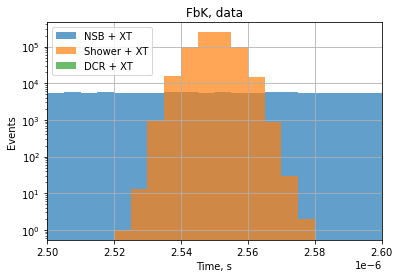

In [301]:
plt.hist(fbk_long_nsb_time, bins = 600, range = [0e-9, 3e-6], alpha = 0.7, label='NSB + XT')
plt.hist(fbk_long_signal_time, bins = 600, range = [0e-9, 3e-6], alpha = 0.7, label='Shower + XT')
plt.hist(fbk_long_dcr_time, bins = 600, range = [0e-9, 3e-6], alpha = 0.7, label='DCR + XT')
plt.grid()
plt.xlim(2.50e-6, 2.60e-6)
plt.yscale('log')
plt.title('FbK, data')
plt.ylabel('Events')
plt.xlabel('Time, s')
plt.legend(loc=2)

In [322]:
fbk_long_signal_index = get_signal_index(nuvhd6x6_fbk)
fbk_short_signal_index = get_signal_index(nuvhd6x6_miteq)
lct5_signal_index = get_signal_index(lct5nuv)

In [323]:
np.mean(fbk_long_signal_index)

485.518

In [303]:
fbk_short_signal_time, fbk_short_nsb_time, fbk_short_dcr_time, all_time = get_photon_data(nuvhd6x6_miteq)

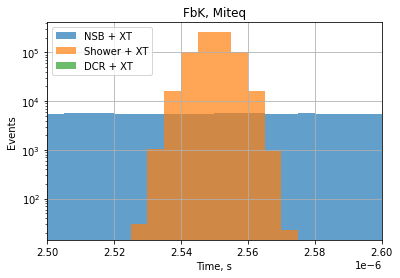

In [305]:
plt.hist(fbk_short_nsb_time, bins = 600, range = [0e-9, 3e-6], alpha = 0.7, label='NSB + XT')
plt.hist(fbk_short_signal_time, bins = 600, range = [0e-9, 3e-6], alpha = 0.7, label='Shower + XT')
plt.hist(fbk_short_dcr_time, bins = 600, range = [0e-9, 3e-6], alpha = 0.7, label='DCR + XT')
plt.grid()
plt.xlim(2.50e-6, 2.60e-6)
plt.yscale('log')
plt.title('FbK, Miteq')
plt.ylabel('Events')
plt.xlabel('Time, s')
plt.legend(loc=2)

In [306]:
lct5_signal_time, lct5_short_nsb_time, lct5_short_dcr_time, all_time = get_photon_data(lct5nuv)

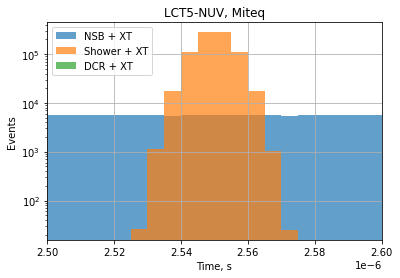

In [308]:
plt.hist(lct5_short_nsb_time, bins = 600, range = [0e-9, 3e-6], alpha = 0.7, label='NSB + XT')
plt.hist(lct5_signal_time, bins = 600, range = [0e-9, 3e-6], alpha = 0.7, label='Shower + XT')
plt.hist(lct5_short_dcr_time, bins = 600, range = [0e-9, 3e-6], alpha = 0.7, label='DCR + XT')
plt.grid()
plt.xlim(2.50e-6, 2.60e-6)
plt.yscale('log')
plt.title('LCT5-NUV, Miteq')
plt.ylabel('Events')
plt.xlabel('Time, s')
plt.legend(loc=2)

## Fake Trigger rate analysis: 

### Dark interval: 

In [35]:
np_25ns = 5
lct5_nuv_max_amplitude_25ns_1px_dark = get_waveforms_1px(lct5nuv, np_25ns)
nuv_hd_email_max_amplitude_ac_25ns_1px_dark = get_waveforms_1px(nuvhd6x6_fbk, np_25ns)
nuv_hd_miteq_max_amplitude_ac_25ns_1px_dark = get_waveforms_1px(nuvhd6x6_miteq, np_25ns)

In [36]:
threshold = np.arange(0.1, 30., 0.2)

n_events_lc5nuv_25ns_dark = get_n_events_vs_threshold(lct5_nuv_max_amplitude_25ns_1px_dark, threshold)
n_events_nuv_hd_email_25ns_dark = get_n_events_vs_threshold(nuv_hd_email_max_amplitude_ac_25ns_1px_dark, threshold)
n_events_nuv_hd_miteq_25ns_dark = get_n_events_vs_threshold(nuv_hd_miteq_max_amplitude_ac_25ns_1px_dark, threshold)

### Signal Interval: 

In [37]:
fbk_long_signal_index = get_signal_index(nuvhd6x6_fbk)
fbk_short_signal_index = get_signal_index(nuvhd6x6_miteq)
lct5_signal_index = get_signal_index(lct5nuv)

### Let see the Signal arraval time: 

In [73]:
lct5nuv_dt_signal_long, lct5nuv_n_p_signal_long, lct5nuv_ampli_signal_long = get_waveform(lct5nuv)
nuvhd6x6_miteq_dt_signal_long, nuvhd6x6_miteq_n_p_signal_long, nuvhd6x6_miteq_ampli_signal_long = get_waveform(nuvhd6x6_miteq)
nuvhd6x6_fbk_dt_signal_long, nuvhd6x6_fbk_n_p_signal_long, nuvhd6x6_fbk_ampli_signal_long = get_waveform(nuvhd6x6_fbk)

(505.0, 520.0)

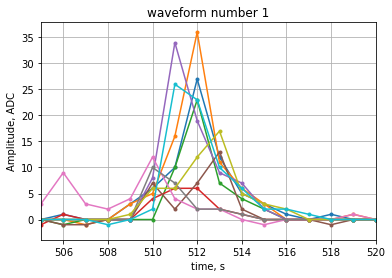

In [74]:
n_start = 1

for i_wf in range(10):
    plt.plot(np.arange(0, lct5nuv_n_p_signal_long, 1), 
         lct5nuv_ampli_signal_long[i_wf], '.-')

plt.grid()
plt.ylabel('Amplitude, ADC')
plt.xlabel('time, s')
plt.title('waveform number {:}'.format(n_start))
plt.xlim(505, 520)

(505.0, 520.0)

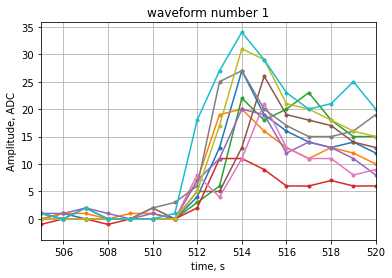

In [75]:
n_start = 1

for i_wf in range(10):
    plt.plot(np.arange(0, nuvhd6x6_miteq_n_p_signal_long, 1), 
         nuvhd6x6_miteq_ampli_signal_long[i_wf], '.-')

plt.grid()
plt.ylabel('Amplitude, ADC')
plt.xlabel('time, s')
plt.title('waveform number {:}'.format(n_start))
plt.xlim(505, 520)

(505.0, 520.0)

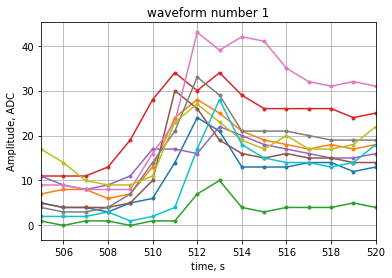

In [76]:
n_start = 1

for i_wf in range(10):
    plt.plot(np.arange(0, nuvhd6x6_fbk_n_p_signal_long, 1), 
         nuvhd6x6_fbk_ampli_signal_long[i_wf], '.-')

plt.grid()
plt.ylabel('Amplitude, ADC')
plt.xlabel('time, s')
plt.title('waveform number {:}'.format(n_start))
plt.xlim(505, 520)

In [77]:
lct5_nuv_max_amplitude_25ns_1px_signal = get_waveforms_1px(lct5nuv, np_25ns, n_points_ignore = 510, baseline_range = (200, 500))
nuv_hd_email_max_amplitude_ac_25ns_1px_signal = get_waveforms_1px(nuvhd6x6_fbk, np_25ns, n_points_ignore = 511, baseline_range = (200, 500))
nuv_hd_miteq_max_amplitude_ac_25ns_1px_signal = get_waveforms_1px(nuvhd6x6_miteq, np_25ns, n_points_ignore = 512, baseline_range = (200, 500))

In [78]:
threshold_signal = np.arange(0, 50, 1)
n_events_lc5nuv_25ns_signal = get_n_events_vs_threshold(lct5_nuv_max_amplitude_25ns_1px_signal, threshold_signal)
n_events_nuv_hd_email_25ns_signal = get_n_events_vs_threshold(nuv_hd_email_max_amplitude_ac_25ns_1px_signal, threshold_signal)
n_events_nuv_hd_miteq_25ns_signal = get_n_events_vs_threshold(nuv_hd_miteq_max_amplitude_ac_25ns_1px_signal, threshold_signal)

### build trogger probability for NSB  and Signal:

In [81]:
n_pe = 5
n_pixels = 1
x_data = threshold/n_pe
x_data_signal = threshold_signal/n_pe
read_out_window_25ns = 25e-9

lct5nuv_trigger_probability_25ns_dark = np.array(n_events_lc5nuv_25ns_dark)/(len(lct5_nuv_max_amplitude_25ns_1px_dark))
n_nuv_hd_email_trigger_probability_25ns_dark = np.array(n_events_nuv_hd_email_25ns_dark)/(len(nuv_hd_email_max_amplitude_ac_25ns_1px_dark))
n_nuv_hd_miteq_trigger_probability_25ns_dark = np.array(n_events_nuv_hd_miteq_25ns_dark)/(len(nuv_hd_miteq_max_amplitude_ac_25ns_1px_dark))

lct5nuv_trigger_probability_25ns_signal = np.array(n_events_lc5nuv_25ns_signal)/(len(lct5_nuv_max_amplitude_25ns_1px_signal))
n_nuv_hd_email_trigger_probability_25ns_signal = np.array(n_events_nuv_hd_email_25ns_signal)/(len(nuv_hd_email_max_amplitude_ac_25ns_1px_signal))
n_nuv_hd_miteq_trigger_probability_25ns_signal = np.array(n_events_nuv_hd_miteq_25ns_signal)/(len(nuv_hd_miteq_max_amplitude_ac_25ns_1px_signal))

plt.plot(x_data, lct5nuv_trigger_probability_25ns_dark,'.', c = 'tab:blue', label='NSB: LCT5-NUV')
plt.plot(x_data, n_nuv_hd_email_trigger_probability_25ns_dark,'.', c = 'tab:red', label='NSB: NUV-HD, FbK (long)')
plt.plot(x_data, n_nuv_hd_miteq_trigger_probability_25ns_dark,'.', c = 'tab:green',label='NSB: NUV-HD, Miteq (short)')

plt.plot(x_data_signal, lct5nuv_trigger_probability_25ns_signal,'-', c = 'tab:blue', label='Signal: LCT5-NUV')
plt.plot(x_data_signal, n_nuv_hd_email_trigger_probability_25ns_signal,'-', c = 'tab:red', label='Signal: NUV-HD, FbK (long)')
plt.plot(x_data_signal, n_nuv_hd_miteq_trigger_probability_25ns_signal,'-', c = 'tab:green',label='Signal: NUV-HD, Miteq (short)')

plt.grid()
plt.yscale('log')
#plt.ylim(500.0, 1e9)
plt.xlim(0, 10)
plt.legend(title = 'Window = 25 ns:')

plt.title('NSB = 9.3 (p.e.) MHz, DCR = 0 MHz, $P_{XT}$ = 20%')
plt.ylabel('Trigger Probability')
plt.xlabel('threshold, p.e.')
plt.savefig('trigger_probability_all.pdf')

In [365]:
import pandas
df = pandas.read_csv('/home/andrii/work/terzina/terzina_analysis/crosstalk_single_rate(Hz)-2.csv')
print(df)


    threshold  2.325 MHz   4.65 MHz    9.3 MHz    18.6 MHz    37.2 MHz  \
0      0.1 PE  2260000.0  4390000.0  8300000.0  14900000.0  24200000.0   
1      0.2 PE  2190000.0  4260000.0  8060000.0  14500000.0  23700000.0   
2      0.3 PE  2190000.0  4260000.0  8060000.0  14500000.0  23700000.0   
3      0.4 PE  2190000.0  4260000.0  8060000.0  14500000.0  23700000.0   
4      0.5 PE  2190000.0  4260000.0  8060000.0  14500000.0  23700000.0   
..        ...        ...        ...        ...         ...         ...   
176   17.7 PE        0.0        0.0        0.0         0.0         0.0   
177   17.8 PE        0.0        0.0        0.0         0.0         0.0   
178   17.9 PE        0.0        0.0        0.0         0.0         0.0   
179   18.0 PE        0.0        0.0        0.0         0.0         0.0   
180   18.1 PE        0.0        0.0        0.0         0.0         0.0   

       74.4 MHz   148.8 MHz   297.6 MHz   595.2 MHz  
0    33800000.0  39000000.0  40000000.0  40000000.0  
1  

In [405]:
rate = np.array(df['9.3 MHz'])
threshold_data = np.array(df['threshold'])

In [406]:
for element in range(len(threshold_data)):
    threshold_data[element] = float(threshold_data[element][:-3])
    print(threshold_data[element])

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2
2.3
2.4
2.5
2.6
2.7
2.8
2.9
3.0
3.1
3.2
3.3
3.4
3.5
3.6
3.7
3.8
3.9
4.0
4.1
4.2
4.3
4.4
4.5
4.6
4.7
4.8
4.9
5.0
5.1
5.2
5.3
5.4
5.5
5.6
5.7
5.8
5.9
6.0
6.1
6.2
6.3
6.4
6.5
6.6
6.7
6.8
6.9
7.0
7.1
7.2
7.3
7.4
7.5
7.6
7.7
7.8
7.9
8.0
8.1
8.2
8.3
8.4
8.5
8.6
8.7
8.8
8.9
9.0
9.1
9.2
9.3
9.4
9.5
9.6
9.7
9.8
9.9
10.0
10.1
10.2
10.3
10.4
10.5
10.6
10.7
10.8
10.9
11.0
11.1
11.2
11.3
11.4
11.5
11.6
11.7
11.8
11.9
12.0
12.1
12.2
12.3
12.4
12.5
12.6
12.7
12.8
12.9
13.0
13.1
13.2
13.3
13.4
13.5
13.6
13.7
13.8
13.9
14.0
14.1
14.2
14.3
14.4
14.5
14.6
14.7
14.8
14.9
15.0
15.1
15.2
15.3
15.4
15.5
15.6
15.7
15.8
15.9
16.0
16.1
16.2
16.3
16.4
16.5
16.6
16.7
16.8
16.9
17.0
17.1
17.2
17.3
17.4
17.5
17.6
17.7
17.8
17.9
18.0
18.1


ValueError: x and y must have same first dimension, but have shapes (150,) and (181,)

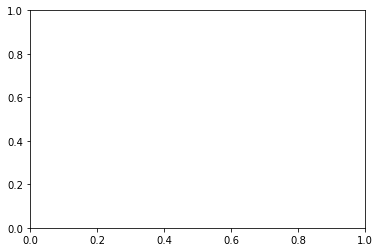

In [403]:
plt.plot(threshold, rate)

In [358]:
calc_data_pe = [1., 2., 3., 4.]
calc_data_rate = [4256110, 45301, 258.9, 1.4]

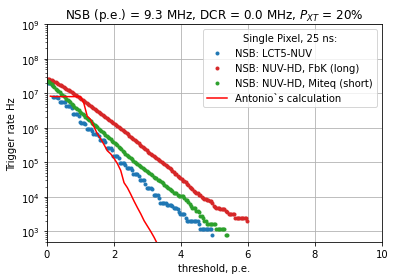

In [415]:
n_pe = 5
n_pixels = 1
x_data = threshold/n_pe
read_out_window_25ns = 25e-9

lct5nuv_trigger_rate_25ns = n_pixels*np.array(n_events_lc5nuv_25ns_dark)/(len(lct5_nuv_max_amplitude_25ns_1px_dark)*read_out_window_25ns)
n_nuv_hd_email_trigger_rate_25ns = n_pixels*np.array(n_events_nuv_hd_email_25ns_dark)/(len(nuv_hd_email_max_amplitude_ac_25ns_1px_dark)*read_out_window_25ns)
n_nuv_hd_miteq_trigger_rate_25ns = n_pixels*np.array(n_events_nuv_hd_miteq_25ns_dark)/(len(nuv_hd_miteq_max_amplitude_ac_25ns_1px_dark)*read_out_window_25ns)

plt.plot(x_data, lct5nuv_trigger_rate_25ns,'.', c = 'tab:blue', label='NSB: LCT5-NUV')
plt.plot(x_data, n_nuv_hd_email_trigger_rate_25ns,'.', c = 'tab:red', label='NSB: NUV-HD, FbK (long)')
plt.plot(x_data, n_nuv_hd_miteq_trigger_rate_25ns,'.', c = 'tab:green',label='NSB: NUV-HD, Miteq (short)')
#plt.plot(calc_data_pe, calc_data_rate, 'r.-')
plt.plot(threshold_data, rate, 'r-', label='Antonio`s calculation')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 1e9)
plt.xlim(0, 10)
plt.legend(title = 'Single Pixel, 25 ns:')

plt.title('NSB (p.e.) = 9.3 MHz, DCR = 0.0 MHz, $P_{XT}$ = 20%')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')
plt.savefig('rate_comparison.pdf')

In [59]:
time_window_n_points = 20

lct5nuv_max_amplitude_ac_100ns_1px = get_waveforms_1px(lct5nuv, time_window_n_points)
nuv_hd_email_max_amplitude_ac_100ns_1px = get_waveforms_1px(nuvhd6x6_fbk, time_window_n_points)
nuv_hd_miteq_max_amplitude_ac_100ns_1px = get_waveforms_1px(nuvhd6x6_miteq, time_window_n_points)

In [60]:
threshold = np.arange(0.1, 30., 0.2)

n_events_lc5nuv_100ns = get_n_events_vs_threshold(lct5nuv_max_amplitude_ac_100ns_1px, threshold)
n_events_nuv_hd_email_100ns = get_n_events_vs_threshold(nuv_hd_email_max_amplitude_ac_100ns_1px, threshold)
n_events_nuv_hd_miteq_100ns = get_n_events_vs_threshold(nuv_hd_miteq_max_amplitude_ac_100ns_1px, threshold)

Text(0.5, 0, 'threshold, p.e.')

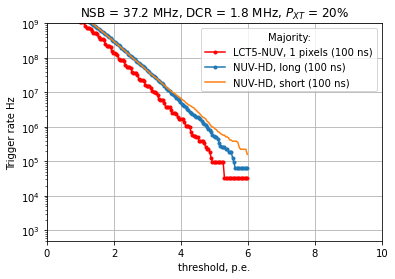

In [61]:
n_pe = 5
n_pixels = 640
x_data = threshold/n_pe
read_out_window_100ns = 100e-9

lct5nuv_trigger_rate_100ns = n_pixels*np.array(n_events_lc5nuv_100ns)/(len(lct5nuv_max_amplitude_ac_100ns_1px)*read_out_window_100ns)
n_nuv_hd_email_trigger_rate_100ns = n_pixels*np.array(n_events_nuv_hd_email_100ns)/(len(nuv_hd_email_max_amplitude_ac_100ns_1px)*read_out_window_100ns)
n_nuv_hd_miteq_trigger_rate_100ns = n_pixels*np.array(n_events_nuv_hd_miteq_100ns)/(len(nuv_hd_miteq_max_amplitude_ac_100ns_1px)*read_out_window_100ns)

plt.plot(x_data, lct5nuv_trigger_rate_100ns,'r.-', label='LCT5-NUV, 1 pixels (100 ns)')
plt.plot(x_data, n_nuv_hd_email_trigger_rate_100ns,'.-', label='NUV-HD, long (100 ns)')
plt.plot(x_data, n_nuv_hd_miteq_trigger_rate_100ns,'-', label='NUV-HD, short (100 ns)')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 1e9)
plt.xlim(0, 10)
plt.legend(title = 'Majority:')

plt.title('NSB = 37.2 MHz, DCR = 1.8 MHz, $P_{XT}$ = 20%')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

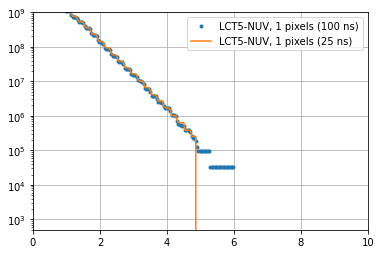

In [67]:
plt.plot(x_data, lct5nuv_trigger_rate_100ns,'.', label='LCT5-NUV, 1 pixels (100 ns)')
plt.plot(x_data, lct5nuv_trigger_rate_25ns,'-', label='LCT5-NUV, 1 pixels (25 ns)')
plt.grid()
plt.yscale('log')
plt.ylim(500.0, 1e9)
plt.xlim(0, 10)
plt.legend()

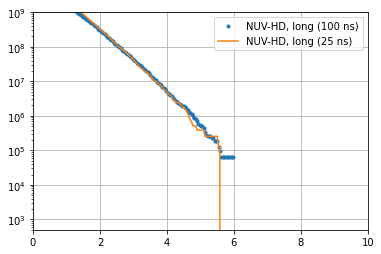

In [69]:
plt.plot(x_data, n_nuv_hd_email_trigger_rate_100ns,'.', label='NUV-HD, long (100 ns)')
plt.plot(x_data, n_nuv_hd_email_trigger_rate_25ns,'-', label='NUV-HD, long (25 ns)')
plt.grid()
plt.yscale('log')
plt.ylim(500.0, 1e9)
plt.xlim(0, 10)
plt.legend()

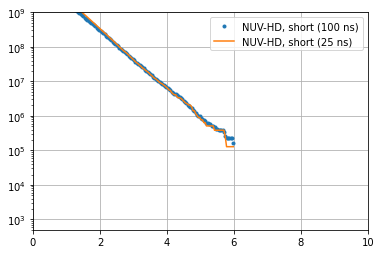

In [71]:
plt.plot(x_data, n_nuv_hd_miteq_trigger_rate_100ns,'.', label='NUV-HD, short (100 ns)')
plt.plot(x_data, n_nuv_hd_miteq_trigger_rate_25ns,'-', label='NUV-HD, short (25 ns)')
plt.grid()
plt.yscale('log')
plt.ylim(500.0, 1e9)
plt.xlim(0, 10)
plt.legend()

In [ ]:
thresholds = np.arange(0.1, 40., 0.2)

n_events_1pixels_all_ac_100ns_2x2 = []

n_events_1pixels_all_ac_100ns = []
n_events_1pixels_all_ac_50ns = []
n_events_1pixels_all_ac_25ns = []
#n_events_2pixels_all_ac_100ns = []
#n_events_4pixels_all_ac_100ns = []
#n_events_5pixels_all_ac_100ns = []
#n_events_9pixels_all_ac_100ns = []

for i_th in thresholds:
    #print(i_th)
    #data_cross_ac_100ns_1px
    n_events_1pixels_all_ac_100ns.append( len(data_cross_ac_100ns_1px[data_cross_ac_100ns_1px>i_th]) )
    n_events_1pixels_all_ac_50ns.append( len(data_cross_ac_50ns_1px[data_cross_ac_50ns_1px>i_th]) )
    n_events_1pixels_all_ac_25ns.append( len(data_cross_ac_25ns_1px[data_cross_ac_25ns_1px>i_th]) )
    
    n_events_1pixels_all_ac_100ns_2x2.append( len(data_cross_ac_100ns_1px_2x2[data_cross_ac_100ns_1px_2x2>i_th]) )
    
    #n_events_2pixels_all_ac_100ns.append( len(data_cross_ac_100ns_2px[data_cross_ac_100ns_2px>i_th]) )
    #n_events_4pixels_all_ac_100ns.append( len(data_cross_ac_100ns_4px[data_cross_ac_100ns_4px>i_th]) )
    #n_events_5pixels_all_ac_100ns.append( len(data_cross_ac_100ns_5px[data_cross_ac_100ns_5px>i_th]) )
    #n_events_9pixels_all_ac_100ns.append( len(data_cross_ac_100ns_9px[data_cross_ac_100ns_9px>i_th]) )

In [23]:
file = '/home/andrii/Terzina_sim/Pxt_020/3V_4.61e+07_Hz_0_AC_Compenstion_Off.root'

data_cross_ac_100ns_1px = get_waveforms_1px(file, 20)

In [24]:
data_cross_ac_50ns_1px = get_waveforms_1px(file, 10)
data_cross_ac_25ns_1px = get_waveforms_1px(file, 5)

In [31]:
file_2x2 = '/home/andrii/Terzina_sim/Pxt_020/3V_2.044e+07_Hz_0_AC_Compenstion_Off.root'
data_cross_ac_100ns_1px_2x2 = get_waveforms_1px(file_2x2, 20)

KeyboardInterrupt: 

In [11]:
file_1 = '/home/andrii/Terzina_sim/Pxt_020/3V_4.6e+07_Hz_0_AC_Compenstion_Off.root'
file_2 = '/home/andrii/Terzina_sim/Pxt_020/3V_4.60001e+07_Hz_0_AC_Compenstion_Off.root'
file_3 = '/home/andrii/Terzina_sim/Pxt_020/3V_4.60002e+07_Hz_0_AC_Compenstion_Off.root'
file_4 = '/home/andrii/Terzina_sim/Pxt_020/3V_4.60003e+07_Hz_0_AC_Compenstion_Off.root'
file_5 = '/home/andrii/Terzina_sim/Pxt_020/3V_4.60004e+07_Hz_0_AC_Compenstion_Off.root'
file_6 = '/home/andrii/Terzina_sim/Pxt_020/3V_4.60005e+07_Hz_0_AC_Compenstion_Off.root'
file_7 = '/home/andrii/Terzina_sim/Pxt_020/3V_4.60006e+07_Hz_0_AC_Compenstion_Off.root'
file_8 = '/home/andrii/Terzina_sim/Pxt_020/3V_4.60007e+07_Hz_0_AC_Compenstion_Off.root'
file_9 = '/home/andrii/Terzina_sim/Pxt_020/3V_4.60008e+07_Hz_0_AC_Compenstion_Off.root'

In [25]:
dt_1, n_p_1, ampli_1 = get_waveform(file)
#dt_2, n_p_2, ampli_2 = get_waveform(file_2)
#dt_3, n_p_3, ampli_3 = get_waveform(file_3)
#dt_4, n_p_4, ampli_4 = get_waveform(file_4)
#dt_5, n_p_5, ampli_5 = get_waveform(file_5)
#dt_6, n_p_6, ampli_6 = get_waveform(file_6)
#dt_7, n_p_7, ampli_7 = get_waveform(file_7)
#dt_8, n_p_8, ampli_8 = get_waveform(file_8)
#dt_9, n_p_9, ampli_9 = get_waveform(file_9)

Text(0.5, 0, 'time, s')

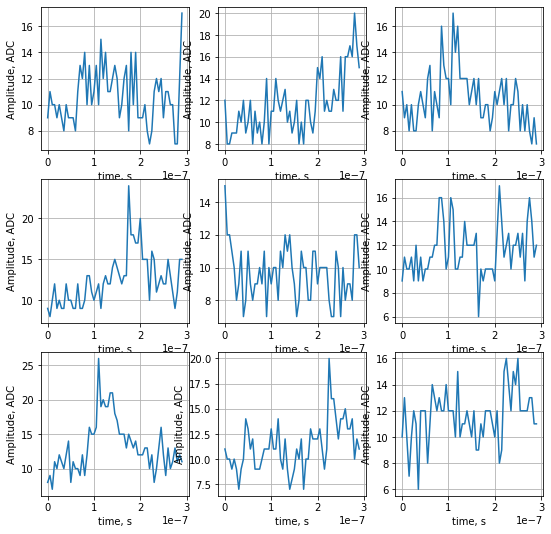

In [28]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
axs[0,0].plot(np.arange(0, n_p_1*dt_1, dt_1), ampli_1[0])
axs[0,0].grid()
axs[0,0].set_ylabel('Amplitude, ADC')
axs[0,0].set_xlabel('time, s')

axs[0,1].plot(np.arange(0, n_p_1*dt_1, dt_1), ampli_1[1])
axs[0,1].grid()
axs[0,1].set_ylabel('Amplitude, ADC')
axs[0,1].set_xlabel('time, s')

axs[0,2].plot(np.arange(0, n_p_1*dt_1, dt_1), ampli_1[2])
axs[0,2].grid()
axs[0,2].set_ylabel('Amplitude, ADC')
axs[0,2].set_xlabel('time, s')

axs[1,0].plot(np.arange(0, n_p_1*dt_1, dt_1), ampli_1[3])
axs[1,0].grid()
axs[1,0].set_ylabel('Amplitude, ADC')
axs[1,0].set_xlabel('time, s')

axs[1,1].plot(np.arange(0, n_p_1*dt_1, dt_1), ampli_1[4])
axs[1,1].grid()
axs[1,1].set_ylabel('Amplitude, ADC')
axs[1,1].set_xlabel('time, s')

axs[1,2].plot(np.arange(0, n_p_1*dt_1, dt_1), ampli_1[5])
axs[1,2].grid()
axs[1,2].set_ylabel('Amplitude, ADC')
axs[1,2].set_xlabel('time, s')

axs[2,0].plot(np.arange(0, n_p_1*dt_1, dt_1), ampli_1[6])
axs[2,0].grid()
axs[2,0].set_ylabel('Amplitude, ADC')
axs[2,0].set_xlabel('time, s')

axs[2,1].plot(np.arange(0, n_p_1*dt_1, dt_1), ampli_1[7])
axs[2,1].grid()
axs[2,1].set_ylabel('Amplitude, ADC')
axs[2,1].set_xlabel('time, s')

axs[2,2].plot(np.arange(0, n_p_1*dt_1, dt_1), ampli_1[8])
axs[2,2].grid()
axs[2,2].set_ylabel('Amplitude, ADC')
axs[2,2].set_xlabel('time, s')

In [14]:
plt.plot(np.arange(0, n_p_1*dt_1, dt_1), ampli_1[0])
plt.plot(np.arange(0, n_p_1*dt_1, dt_1), ampli_2[0])
plt.plot(np.arange(0, n_p_1*dt_1, dt_1), ampli_3[0])
plt.plot(np.arange(0, n_p_1*dt_1, dt_1), ampli_4[0])
plt.plot(np.arange(0, n_p_1*dt_1, dt_1), ampli_5[0])
plt.grid()

In [12]:
data_cross_ac_100ns_2px = get_waveforms_2px(file_1, file_2, 20, do_sum = False)
data_cross_ac_100ns_4px = get_waveforms_4px(file_1, file_2, file_3, file_4, 20, do_sum = False)
data_cross_ac_100ns_5px = get_waveforms_5px(file_1, file_2, file_3, file_4, file_5, 20, do_sum = False)
data_cross_ac_100ns_9px = get_waveforms_9px(file_1, file_2, file_3, file_4, file_5, file_6, file_7, file_8, file_9, 20, do_sum = False)

In [13]:
data_cross_ac_50ns_2px = get_waveforms_2px(file_1, file_2, 10, do_sum = False)
data_cross_ac_50ns_4px = get_waveforms_4px(file_1, file_2, file_3, file_4, 10, do_sum = False)
data_cross_ac_50ns_5px = get_waveforms_5px(file_1, file_2, file_3, file_4, file_5, 10, do_sum = False)
data_cross_ac_50ns_9px = get_waveforms_9px(file_1, file_2, file_3, file_4, file_5, file_6, file_7, file_8, file_9, 10, do_sum = False)

In [14]:
data_cross_ac_25ns_2px = get_waveforms_2px(file_1, file_2, 5, do_sum = False)
data_cross_ac_25ns_4px = get_waveforms_4px(file_1, file_2, file_3, file_4, 5, do_sum = False)
data_cross_ac_25ns_5px = get_waveforms_5px(file_1, file_2, file_3, file_4, file_5, 5, do_sum = False)
data_cross_ac_25ns_9px = get_waveforms_9px(file_1, file_2, file_3, file_4, file_5, file_6, file_7, file_8, file_9, 5, do_sum = False)

In [67]:
data_cross_ac_100ns_2px_sum = get_waveforms_2px(file_1, file_2, 20, do_sum = True)
data_cross_ac_100ns_4px_sum = get_waveforms_4px(file_1, file_2, file_3, file_4, 20, do_sum = True)
data_cross_ac_100ns_5px_sum = get_waveforms_5px(file_1, file_2, file_3, file_4, file_5, 20, do_sum = True)
data_cross_ac_100ns_9px_sum = get_waveforms_9px(file_1, file_2, file_3, file_4, file_5, file_6, file_7, file_8, file_9, 20, do_sum = True)

In [68]:
data_cross_ac_50ns_2px_sum = get_waveforms_2px(file_1, file_2, 10, do_sum = True)
data_cross_ac_50ns_4px_sum = get_waveforms_4px(file_1, file_2, file_3, file_4, 10, do_sum = True)
data_cross_ac_50ns_5px_sum = get_waveforms_5px(file_1, file_2, file_3, file_4, file_5, 10, do_sum = True)
data_cross_ac_50ns_9px_sum = get_waveforms_9px(file_1, file_2, file_3, file_4, file_5, file_6, file_7, file_8, file_9, 10, do_sum = True)

In [69]:
data_cross_ac_25ns_2px_sum = get_waveforms_2px(file_1, file_2, 5, do_sum = True)
data_cross_ac_25ns_4px_sum = get_waveforms_4px(file_1, file_2, file_3, file_4, 5, do_sum = True)
data_cross_ac_25ns_5px_sum = get_waveforms_5px(file_1, file_2, file_3, file_4, file_5, 5, do_sum = True)
data_cross_ac_25ns_9px_sum = get_waveforms_9px(file_1, file_2, file_3, file_4, file_5, file_6, file_7, file_8, file_9, 5, do_sum = True)

In [ ]:
thresholds = np.arange(0.1, 40., 0.2)

n_events_1pixels_all_ac_100ns_2x2 = []

n_events_1pixels_all_ac_100ns = []
n_events_1pixels_all_ac_50ns = []
n_events_1pixels_all_ac_25ns = []
#n_events_2pixels_all_ac_100ns = []
#n_events_4pixels_all_ac_100ns = []
#n_events_5pixels_all_ac_100ns = []
#n_events_9pixels_all_ac_100ns = []

for i_th in thresholds:
    #print(i_th)
    #data_cross_ac_100ns_1px
    n_events_1pixels_all_ac_100ns.append( len(data_cross_ac_100ns_1px[data_cross_ac_100ns_1px>i_th]) )
    n_events_1pixels_all_ac_50ns.append( len(data_cross_ac_50ns_1px[data_cross_ac_50ns_1px>i_th]) )
    n_events_1pixels_all_ac_25ns.append( len(data_cross_ac_25ns_1px[data_cross_ac_25ns_1px>i_th]) )
    
    n_events_1pixels_all_ac_100ns_2x2.append( len(data_cross_ac_100ns_1px_2x2[data_cross_ac_100ns_1px_2x2>i_th]) )
    
    #n_events_2pixels_all_ac_100ns.append( len(data_cross_ac_100ns_2px[data_cross_ac_100ns_2px>i_th]) )
    #n_events_4pixels_all_ac_100ns.append( len(data_cross_ac_100ns_4px[data_cross_ac_100ns_4px>i_th]) )
    #n_events_5pixels_all_ac_100ns.append( len(data_cross_ac_100ns_5px[data_cross_ac_100ns_5px>i_th]) )
    #n_events_9pixels_all_ac_100ns.append( len(data_cross_ac_100ns_9px[data_cross_ac_100ns_9px>i_th]) )

In [15]:
thresholds = np.arange(0.1, 100., 0.2)


n_events_2pixels_all_ac_100ns = []
n_events_4pixels_all_ac_100ns = []
n_events_5pixels_all_ac_100ns = []
n_events_9pixels_all_ac_100ns = []

n_events_2pixels_all_ac_50ns = []
n_events_4pixels_all_ac_50ns = []
n_events_5pixels_all_ac_50ns = []
n_events_9pixels_all_ac_50ns = []

n_events_2pixels_all_ac_25ns = []
n_events_4pixels_all_ac_25ns = []
n_events_5pixels_all_ac_25ns = []
n_events_9pixels_all_ac_25ns = []

for i_th in thresholds:
    #print(i_th)
    
    n_events_2pixels_all_ac_100ns.append( len(data_cross_ac_100ns_2px[data_cross_ac_100ns_2px>i_th]) )
    n_events_4pixels_all_ac_100ns.append( len(data_cross_ac_100ns_4px[data_cross_ac_100ns_4px>i_th]) )
    n_events_5pixels_all_ac_100ns.append( len(data_cross_ac_100ns_5px[data_cross_ac_100ns_5px>i_th]) )
    n_events_9pixels_all_ac_100ns.append( len(data_cross_ac_100ns_9px[data_cross_ac_100ns_9px>i_th]) )
    
    
    n_events_2pixels_all_ac_50ns.append( len(data_cross_ac_50ns_2px[data_cross_ac_50ns_2px>i_th]) )
    n_events_4pixels_all_ac_50ns.append( len(data_cross_ac_50ns_4px[data_cross_ac_50ns_4px>i_th]) )
    n_events_5pixels_all_ac_50ns.append( len(data_cross_ac_50ns_5px[data_cross_ac_50ns_5px>i_th]) )
    n_events_9pixels_all_ac_50ns.append( len(data_cross_ac_50ns_9px[data_cross_ac_50ns_9px>i_th]) )
    
    n_events_2pixels_all_ac_25ns.append( len(data_cross_ac_25ns_2px[data_cross_ac_25ns_2px>i_th]) )
    n_events_4pixels_all_ac_25ns.append( len(data_cross_ac_25ns_4px[data_cross_ac_25ns_4px>i_th]) )
    n_events_5pixels_all_ac_25ns.append( len(data_cross_ac_25ns_5px[data_cross_ac_25ns_5px>i_th]) )
    n_events_9pixels_all_ac_25ns.append( len(data_cross_ac_25ns_9px[data_cross_ac_25ns_9px>i_th]) )

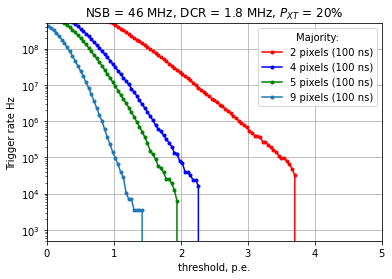

In [18]:
read_out_window_100ns = 100e-9
read_out_window_50ns = 50e-9
read_out_window_25ns = 25e-9
read_out_window_10ns = 10e-9
n_pixels = 640
n_pe = 5
x_data = thresholds/n_pe

y_data_ac_100ns_2px = (n_pixels/2.)*np.array(n_events_2pixels_all_ac_100ns)/(len(data_cross_ac_100ns_2px)*read_out_window_100ns)
y_data_ac_100ns_4px = (n_pixels/4.)*np.array(n_events_4pixels_all_ac_100ns)/(len(data_cross_ac_100ns_4px)*read_out_window_100ns)
y_data_ac_100ns_5px = (n_pixels/5.)*np.array(n_events_5pixels_all_ac_100ns)/(len(data_cross_ac_100ns_5px)*read_out_window_100ns)
y_data_ac_100ns_9px = (n_pixels/9.)*np.array(n_events_9pixels_all_ac_100ns)/(len(data_cross_ac_100ns_9px)*read_out_window_100ns)

plt.plot(x_data[:-277], y_data_ac_100ns_2px[:-277],'r.-', label='2 pixels (100 ns)')
plt.plot(x_data[:-205], y_data_ac_100ns_4px[:-205],'b.-', label='4 pixels (100 ns)')
plt.plot(x_data[:-150], y_data_ac_100ns_5px[:-150],'g.-', label='5 pixels (100 ns)')
plt.plot(x_data[:-1], y_data_ac_100ns_9px[:-1],'tab:blue', marker = '.', label='9 pixels (100 ns)')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 5e8)
plt.xlim(0, 5)
plt.legend(title = 'Majority:')

plt.title('NSB = 46 MHz, DCR = 1.8 MHz, $P_{XT}$ = 20%')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

plt.savefig('100ns_Pxt_20.png', dpi = 200)

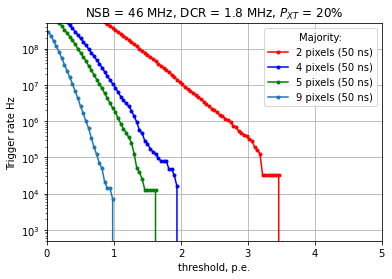

In [17]:
read_out_window_100ns = 100e-9
read_out_window_50ns = 50e-9
read_out_window_25ns = 25e-9
read_out_window_10ns = 10e-9
n_pixels = 640
n_pe = 5
x_data = thresholds/n_pe

y_data_ac_50ns_2px = (n_pixels/2.)*np.array(n_events_2pixels_all_ac_50ns)/(len(data_cross_ac_50ns_2px)*read_out_window_50ns)
y_data_ac_50ns_4px = (n_pixels/4.)*np.array(n_events_4pixels_all_ac_50ns)/(len(data_cross_ac_50ns_4px)*read_out_window_50ns)
y_data_ac_50ns_5px = (n_pixels/5.)*np.array(n_events_5pixels_all_ac_50ns)/(len(data_cross_ac_50ns_5px)*read_out_window_50ns)
y_data_ac_50ns_9px = (n_pixels/9.)*np.array(n_events_9pixels_all_ac_50ns)/(len(data_cross_ac_50ns_9px)*read_out_window_50ns)

plt.plot(x_data[:-277], y_data_ac_50ns_2px[:-277],'r.-', label='2 pixels (50 ns)')
plt.plot(x_data[:-205], y_data_ac_50ns_4px[:-205],'b.-', label='4 pixels (50 ns)')
plt.plot(x_data[:-150], y_data_ac_50ns_5px[:-150],'g.-', label='5 pixels (50 ns)')
plt.plot(x_data[:-1], y_data_ac_50ns_9px[:-1],'tab:blue', marker = '.', label='9 pixels (50 ns)')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 5e8)
plt.xlim(0, 5)
plt.legend(title = 'Majority:')

plt.title('NSB = 46 MHz, DCR = 1.8 MHz, $P_{XT}$ = 20%')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

plt.savefig('50ns_Pxt_20.png', dpi = 200)

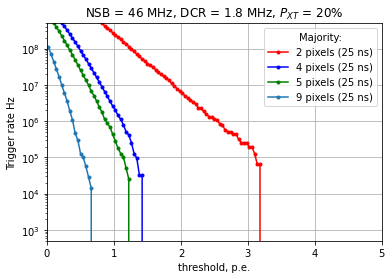

In [19]:
read_out_window_100ns = 100e-9
read_out_window_50ns = 50e-9
read_out_window_25ns = 25e-9
read_out_window_10ns = 10e-9
n_pixels = 640
n_pe = 5
x_data = thresholds/n_pe

y_data_ac_25ns_2px = (n_pixels/2.)*np.array(n_events_2pixels_all_ac_25ns)/(len(data_cross_ac_25ns_2px)*read_out_window_25ns)
y_data_ac_25ns_4px = (n_pixels/4.)*np.array(n_events_4pixels_all_ac_25ns)/(len(data_cross_ac_25ns_4px)*read_out_window_25ns)
y_data_ac_25ns_5px = (n_pixels/5.)*np.array(n_events_5pixels_all_ac_25ns)/(len(data_cross_ac_25ns_5px)*read_out_window_25ns)
y_data_ac_25ns_9px = (n_pixels/9.)*np.array(n_events_9pixels_all_ac_25ns)/(len(data_cross_ac_25ns_9px)*read_out_window_25ns)

plt.plot(x_data[:-277], y_data_ac_25ns_2px[:-277],'r.-', label='2 pixels (25 ns)')
plt.plot(x_data[:-205], y_data_ac_25ns_4px[:-205],'b.-', label='4 pixels (25 ns)')
plt.plot(x_data[:-150], y_data_ac_25ns_5px[:-150],'g.-', label='5 pixels (25 ns)')
plt.plot(x_data[:-1], y_data_ac_25ns_9px[:-1],'tab:blue', marker = '.', label='9 pixels (25 ns)')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 5e8)
plt.xlim(0, 5)
plt.legend(title = 'Majority:')

plt.title('NSB = 46 MHz, DCR = 1.8 MHz, $P_{XT}$ = 20%')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

plt.savefig('25ns_Pxt_20.png', dpi = 200)

In [ ]:
read_out_window_100ns = 100e-9
read_out_window_50ns = 50e-9
read_out_window_25ns = 25e-9
read_out_window_10ns = 10e-9
n_pixels = 640
n_pe = 5
x_data = thresholds/n_pe

y_data_ac_100ns_2px = (n_pixels/2.)*np.array(n_events_2pixels_all_ac_100ns_sum)/(len(data_cross_ac_100ns_2px_sum)*read_out_window_100ns)
y_data_ac_100ns_4px = (n_pixels/4.)*np.array(n_events_4pixels_all_ac_100ns_sum)/(len(data_cross_ac_100ns_4px_sum)*read_out_window_100ns)
y_data_ac_100ns_5px = (n_pixels/5.)*np.array(n_events_5pixels_all_ac_100ns_sum)/(len(data_cross_ac_100ns_5px_sum)*read_out_window_100ns)
y_data_ac_100ns_9px = (n_pixels/9.)*np.array(n_events_9pixels_all_ac_100ns_sum)/(len(data_cross_ac_100ns_9px_sum)*read_out_window_100ns)

plt.plot(x_data[:-277], y_data_ac_100ns_2px[:-277],'r.-', label='2 pixels (100 ns)')
plt.plot(x_data[:-205], y_data_ac_100ns_4px[:-205],'b.-', label='4 pixels (100 ns)')
plt.plot(x_data[:-150], y_data_ac_100ns_5px[:-150],'g.-', label='5 pixels (100 ns)')
plt.plot(x_data[:-1], y_data_ac_100ns_9px[:-1],'tab:blue', marker = '.', label='9 pixels (100 ns)')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 5e8)
plt.xlim(0, 20)
plt.legend(title = 'Sum:')

plt.title('NSB = 46 MHz, DCR = 1.8 MHz, $P_{XT}$ = 20%')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

plt.savefig('Sum_100ns_Pxt_20.png', dpi = 200)

In [ ]:
read_out_window_100ns = 100e-9
read_out_window_50ns = 50e-9
read_out_window_25ns = 25e-9
read_out_window_10ns = 10e-9
n_pixels = 640
n_pe = 5
x_data = thresholds/n_pe

y_data_ac_100ns_2px = (n_pixels/2.)*np.array(n_events_2pixels_all_ac_100ns_sum)/(len(data_cross_ac_100ns_2px_sum)*read_out_window_100ns)
y_data_ac_100ns_4px = (n_pixels/4.)*np.array(n_events_4pixels_all_ac_100ns_sum)/(len(data_cross_ac_100ns_4px_sum)*read_out_window_100ns)
y_data_ac_100ns_5px = (n_pixels/5.)*np.array(n_events_5pixels_all_ac_100ns_sum)/(len(data_cross_ac_100ns_5px_sum)*read_out_window_100ns)
y_data_ac_100ns_9px = (n_pixels/9.)*np.array(n_events_9pixels_all_ac_100ns_sum)/(len(data_cross_ac_100ns_9px_sum)*read_out_window_100ns)

plt.plot(x_data[:-277], y_data_ac_100ns_2px[:-277],'r.-', label='2 pixels (100 ns)')
plt.plot(x_data[:-205], y_data_ac_100ns_4px[:-205],'b.-', label='4 pixels (100 ns)')
plt.plot(x_data[:-150], y_data_ac_100ns_5px[:-150],'g.-', label='5 pixels (100 ns)')
plt.plot(x_data[:-1], y_data_ac_100ns_9px[:-1],'tab:blue', marker = '.', label='9 pixels (100 ns)')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 5e8)
plt.xlim(0, 20)
plt.legend(title = 'Sum:')

plt.title('NSB = 46 MHz, DCR = 1.8 MHz, $P_{XT}$ = 20%')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

plt.savefig('Sum_100ns_Pxt_20.png', dpi = 200)

In [90]:
thresholds = np.arange(0.1, 100., 0.2)


n_events_2pixels_all_ac_100ns_sum = []
n_events_4pixels_all_ac_100ns_sum = []
n_events_5pixels_all_ac_100ns_sum = []
n_events_9pixels_all_ac_100ns_sum = []

n_events_2pixels_all_ac_50ns_sum = []
n_events_4pixels_all_ac_50ns_sum = []
n_events_5pixels_all_ac_50ns_sum = []
n_events_9pixels_all_ac_50ns_sum = []

n_events_2pixels_all_ac_25ns_sum = []
n_events_4pixels_all_ac_25ns_sum = []
n_events_5pixels_all_ac_25ns_sum = []
n_events_9pixels_all_ac_25ns_sum = []

for i_th in thresholds:
    #print(i_th)
    
    n_events_2pixels_all_ac_100ns_sum.append( len(data_cross_ac_100ns_2px_sum[data_cross_ac_100ns_2px_sum>i_th]) )
    n_events_4pixels_all_ac_100ns_sum.append( len(data_cross_ac_100ns_4px_sum[data_cross_ac_100ns_4px_sum>i_th]) )
    n_events_5pixels_all_ac_100ns_sum.append( len(data_cross_ac_100ns_5px_sum[data_cross_ac_100ns_5px_sum>i_th]) )
    n_events_9pixels_all_ac_100ns_sum.append( len(data_cross_ac_100ns_9px_sum[data_cross_ac_100ns_9px_sum>i_th]) )
    
    
    n_events_2pixels_all_ac_50ns_sum.append( len(data_cross_ac_50ns_2px_sum[data_cross_ac_50ns_2px_sum>i_th]) )
    n_events_4pixels_all_ac_50ns_sum.append( len(data_cross_ac_50ns_4px_sum[data_cross_ac_50ns_4px_sum>i_th]) )
    n_events_5pixels_all_ac_50ns_sum.append( len(data_cross_ac_50ns_5px_sum[data_cross_ac_50ns_5px_sum>i_th]) )
    n_events_9pixels_all_ac_50ns_sum.append( len(data_cross_ac_50ns_9px_sum[data_cross_ac_50ns_9px_sum>i_th]) )
    
    n_events_2pixels_all_ac_25ns_sum.append( len(data_cross_ac_25ns_2px_sum[data_cross_ac_25ns_2px_sum>i_th]) )
    n_events_4pixels_all_ac_25ns_sum.append( len(data_cross_ac_25ns_4px_sum[data_cross_ac_25ns_4px_sum>i_th]) )
    n_events_5pixels_all_ac_25ns_sum.append( len(data_cross_ac_25ns_5px_sum[data_cross_ac_25ns_5px_sum>i_th]) )
    n_events_9pixels_all_ac_25ns_sum.append( len(data_cross_ac_25ns_9px_sum[data_cross_ac_25ns_9px_sum>i_th]) )

In [ ]:
read_out_window_100ns = 100e-9
read_out_window_50ns = 50e-9
read_out_window_25ns = 25e-9
read_out_window_10ns = 10e-9
n_pixels = 640
n_pe = 5
x_data = thresholds/n_pe

y_data_ac_100ns_1px = (n_pixels)*np.array(n_events_1pixels_all_ac_100ns)/(len(data_cross_ac_100ns_1px)*read_out_window_100ns)
y_data_ac_50ns_1px = (n_pixels)*np.array(n_events_1pixels_all_ac_50ns)/(len(data_cross_ac_50ns_1px)*read_out_window_50ns)
y_data_ac_25ns_1px = (n_pixels)*np.array(n_events_1pixels_all_ac_25ns)/(len(data_cross_ac_25ns_1px)*read_out_window_25ns)

y_data_ac_100ns_1px_2x2 = (n_pixels)*np.array(n_events_1pixels_all_ac_100ns_2x2)/(len(data_cross_ac_100ns_1px_2x2)*read_out_window_100ns)

plt.plot(x_data, y_data_ac_100ns_1px_2x2,'r.-', label='1 pixels (2x2) (100 ns)')

plt.plot(x_data, y_data_ac_100ns_1px,'r.-', label='1 pixels (100 ns)')
plt.plot(x_data, y_data_ac_50ns_1px,'b.-', label='1 pixels (50 ns)')
plt.plot(x_data, y_data_ac_25ns_1px,'g.-', label='1 pixels (25 ns)')

plt.grid()
plt.yscale('log')
#plt.ylim(500.0, 1e9)
#plt.xlim(0, 7)
plt.legend()

plt.title('NSB = 46 MHz, DCR = 1.8 MHz, $P_{XT}$ = 20%')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

#plt.savefig('coinsidence_100ns_Pxt_20.png', dpi = 200)

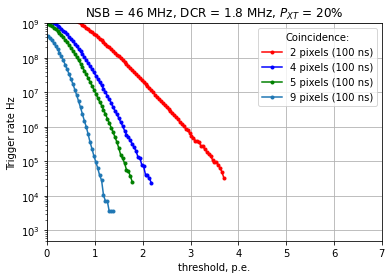

In [66]:
read_out_window_100ns = 100e-9
read_out_window_50ns = 50e-9
read_out_window_25ns = 25e-9
read_out_window_10ns = 10e-9
n_pixels = 640
n_pe = 5
x_data = thresholds/n_pe

y_data_ac_100ns_2px = (n_pixels/2.)*np.array(n_events_2pixels_all_ac_100ns)/(len(data_cross_ac_100ns_2px)*read_out_window_100ns)
y_data_ac_100ns_4px = (n_pixels/4.)*np.array(n_events_4pixels_all_ac_100ns)/(len(data_cross_ac_100ns_4px)*read_out_window_100ns)
y_data_ac_100ns_5px = (n_pixels/5.)*np.array(n_events_5pixels_all_ac_100ns)/(len(data_cross_ac_100ns_5px)*read_out_window_100ns)
y_data_ac_100ns_9px = (n_pixels/9.)*np.array(n_events_9pixels_all_ac_100ns)/(len(data_cross_ac_100ns_9px)*read_out_window_100ns)

plt.plot(x_data[:-107], y_data_ac_100ns_2px[:-107],'r.-', label='2 pixels (100 ns)')
plt.plot(x_data[:-145], y_data_ac_100ns_4px[:-145],'b.-', label='4 pixels (100 ns)')
plt.plot(x_data[:-155], y_data_ac_100ns_5px[:-155],'g.-', label='5 pixels (100 ns)')
plt.plot(x_data[:-165], y_data_ac_100ns_9px[:-165],'tab:blue', marker = '.', label='9 pixels (100 ns)')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 1e9)
plt.xlim(0, 7)
plt.legend(title = 'Coincidence:')

plt.title('NSB = 46 MHz, DCR = 1.8 MHz, $P_{XT}$ = 20%')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

plt.savefig('coinsidence_100ns_Pxt_20.png', dpi = 200)

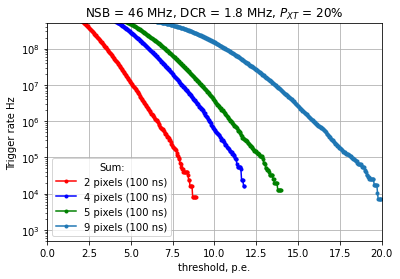

In [95]:
read_out_window_100ns = 100e-9
read_out_window_50ns = 50e-9
read_out_window_25ns = 25e-9
read_out_window_10ns = 10e-9
n_pixels = 640
n_pe = 5
x_data = thresholds/n_pe

y_data_ac_100ns_2px = (n_pixels/2.)*np.array(n_events_2pixels_all_ac_100ns_sum)/(len(data_cross_ac_100ns_2px_sum)*read_out_window_100ns)
y_data_ac_100ns_4px = (n_pixels/4.)*np.array(n_events_4pixels_all_ac_100ns_sum)/(len(data_cross_ac_100ns_4px_sum)*read_out_window_100ns)
y_data_ac_100ns_5px = (n_pixels/5.)*np.array(n_events_5pixels_all_ac_100ns_sum)/(len(data_cross_ac_100ns_5px_sum)*read_out_window_100ns)
y_data_ac_100ns_9px = (n_pixels/9.)*np.array(n_events_9pixels_all_ac_100ns_sum)/(len(data_cross_ac_100ns_9px_sum)*read_out_window_100ns)

plt.plot(x_data[:-277], y_data_ac_100ns_2px[:-277],'r.-', label='2 pixels (100 ns)')
plt.plot(x_data[:-205], y_data_ac_100ns_4px[:-205],'b.-', label='4 pixels (100 ns)')
plt.plot(x_data[:-150], y_data_ac_100ns_5px[:-150],'g.-', label='5 pixels (100 ns)')
plt.plot(x_data[:-1], y_data_ac_100ns_9px[:-1],'tab:blue', marker = '.', label='9 pixels (100 ns)')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 5e8)
plt.xlim(0, 20)
plt.legend(title = 'Sum:')

plt.title('NSB = 46 MHz, DCR = 1.8 MHz, $P_{XT}$ = 20%')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

plt.savefig('Sum_100ns_Pxt_20.png', dpi = 200)

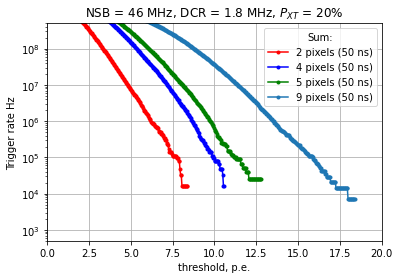

In [111]:
read_out_window_100ns = 100e-9
read_out_window_50ns = 50e-9
read_out_window_25ns = 25e-9
read_out_window_10ns = 10e-9
n_pixels = 640
n_pe = 5
x_data = thresholds/n_pe

y_data_ac_50ns_2px = (n_pixels/2.)*np.array(n_events_2pixels_all_ac_50ns_sum)/(len(data_cross_ac_50ns_2px_sum)*read_out_window_50ns)
y_data_ac_50ns_4px = (n_pixels/4.)*np.array(n_events_4pixels_all_ac_50ns_sum)/(len(data_cross_ac_50ns_4px_sum)*read_out_window_50ns)
y_data_ac_50ns_5px = (n_pixels/5.)*np.array(n_events_5pixels_all_ac_50ns_sum)/(len(data_cross_ac_50ns_5px_sum)*read_out_window_50ns)
y_data_ac_50ns_9px = (n_pixels/9.)*np.array(n_events_9pixels_all_ac_50ns_sum)/(len(data_cross_ac_50ns_9px_sum)*read_out_window_50ns)

plt.plot(x_data[:-290], y_data_ac_50ns_2px[:-290],'r.-', label='2 pixels (50 ns)')
plt.plot(x_data[:-235], y_data_ac_50ns_4px[:-235],'b.-', label='4 pixels (50 ns)')
plt.plot(x_data[:-180], y_data_ac_50ns_5px[:-180],'g.-', label='5 pixels (50 ns)')
plt.plot(x_data[:-40], y_data_ac_50ns_9px[:-40],'tab:blue', marker = '.', label='9 pixels (50 ns)')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 5e8)
plt.xlim(0, 20)
plt.legend(title = 'Sum:')

plt.title('NSB = 46 MHz, DCR = 1.8 MHz, $P_{XT}$ = 20%')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

plt.savefig('Sum_50ns_Pxt_20.png', dpi = 200)

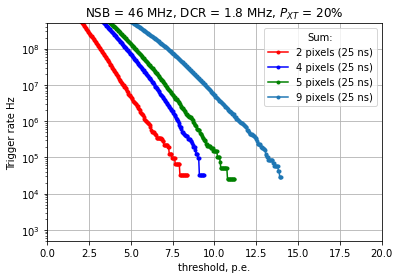

In [128]:
read_out_window_100ns = 100e-9
read_out_window_50ns = 50e-9
read_out_window_25ns = 25e-9
read_out_window_10ns = 10e-9
n_pixels = 640
n_pe = 5
x_data = thresholds/n_pe

y_data_ac_25ns_2px = (n_pixels/2.)*np.array(n_events_2pixels_all_ac_25ns_sum)/(len(data_cross_ac_25ns_2px_sum)*read_out_window_25ns)
y_data_ac_25ns_4px = (n_pixels/4.)*np.array(n_events_4pixels_all_ac_25ns_sum)/(len(data_cross_ac_25ns_4px_sum)*read_out_window_25ns)
y_data_ac_25ns_5px = (n_pixels/5.)*np.array(n_events_5pixels_all_ac_25ns_sum)/(len(data_cross_ac_25ns_5px_sum)*read_out_window_25ns)
y_data_ac_25ns_9px = (n_pixels/9.)*np.array(n_events_9pixels_all_ac_25ns_sum)/(len(data_cross_ac_25ns_9px_sum)*read_out_window_25ns)

plt.plot(x_data[:-290], y_data_ac_25ns_2px[:-290],'r.-', label='2 pixels (25 ns)')
plt.plot(x_data[:-265], y_data_ac_25ns_4px[:-265],'b.-', label='4 pixels (25 ns)')
plt.plot(x_data[:-220], y_data_ac_25ns_5px[:-220],'g.-', label='5 pixels (25 ns)')
plt.plot(x_data[:-150], y_data_ac_25ns_9px[:-150],'tab:blue', marker = '.', label='9 pixels (25 ns)')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 5e8)
plt.xlim(0, 20)
plt.legend(title = 'Sum:')

plt.title('NSB = 46 MHz, DCR = 1.8 MHz, $P_{XT}$ = 20%')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

plt.savefig('Sum_25ns_Pxt_20.png', dpi = 200)

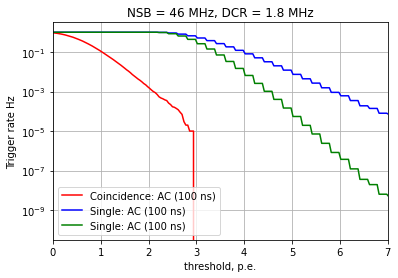

In [28]:
read_out_window_100ns = 100e-9
read_out_window_50ns = 50e-9
read_out_window_25ns = 25e-9
read_out_window_10ns = 10e-9
n_pixels = 640
n_pe = 5
x_data = thresholds/n_pe

y_data_ac_100ns = np.array(n_events_2pixels_all_ac_100ns)/(len(data_cross_ac_100ns))
y_data_ac_100ns_single = np.array(n_events_1pixels_all_ac_100ns)/(len(data_cross_single_100ns))
y_data_ac_100ns_double = y_data_ac_100ns_single*y_data_ac_100ns_single

plt.plot(x_data, y_data_ac_100ns,'r-', label='Coincidence: AC (100 ns)')
plt.plot(x_data, y_data_ac_100ns_single,'b-', label='Single: AC (100 ns)')
plt.plot(x_data, y_data_ac_100ns_double,'g-', label='Single: AC (100 ns)')

plt.grid()
plt.yscale('log')
#plt.ylim(500.0, 1e9)
plt.xlim(0, 7)
plt.legend()

plt.title('NSB = 46 MHz, DCR = 1.8 MHz')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

plt.savefig('rate_all_pixel_coinsidence.png', dpi = 200)